### Load data

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pickle
import pandas as pd
import seaborn as sns
import mplscience
import scanpy as sc
import scvelo as scv

### Latent Analysis

In [2]:
#Choose dataset
datasets=["pancreas", "dentategyrus", "hindbrain"]

#List of models for latent space comparison
models_latent=["expimap", "veloVI", "ivelo", "divelo", "hivelo"]

#List of models for GP comparison
models_GP=["expimap", "ivelo", "divelo"]

#List of models for velocity comparison
models_velocity = ["scvelo", "veloVI", "ivelo", "divelo", "hivelo"]

models_MSE = ["veloVI", "ivelo", "divelo", "hivelo"]

models_velocity_corr=['scvelo', 'veloVI', 'divelo', 'hivelo']

In [3]:
latent_dict={}
for dataset in datasets:
    latent_dict[dataset]={}
    for model in models_latent:
        with open('output/' + dataset + '/' + model + '/latent_analysis.pkl', 'rb') as f:
            model_dict = pickle.load(f)
            latent_dict[dataset][model]=model_dict


#### Plot latent space evaluation

In [6]:
def latent_eval(dataset, dictionary, save = True):    
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(22, 5))
    fig.suptitle('Latent space evaluation ' + dataset)
    models= list(dictionary[dataset].keys())
    latent_dict = dictionary[dataset]
    X_axis = np.arange(len(models))
    axes=(ax1, ax2, ax3, ax4)
    for ax in axes:
        ax.set_xticks(np.arange(len(models))) 
        ax.set_xticklabels(models, fontsize=12)
    ax1.set(ylabel='nmi')
    ax2.set(ylabel='ari')
    ax3.set(ylabel='asw')
    ax4.set(ylabel='cluster avg')
    ax1.bar(X_axis, [latent_dict[models[i]]["nmi"] for i in range(len(models))])
    ax2.bar(X_axis, [latent_dict[models[i]]["ari"] for i in range(len(models))])
    ax3.bar(X_axis, [latent_dict[models[i]]["asw"] for i in range(len(models))] )
    ax4.bar(X_axis, [latent_dict[models[i]]["clust_avg"][0] for i in range(len(models))])
    if save:
        plt.savefig("figures/" + dataset + "/comparison/cluster_evaluation.png")


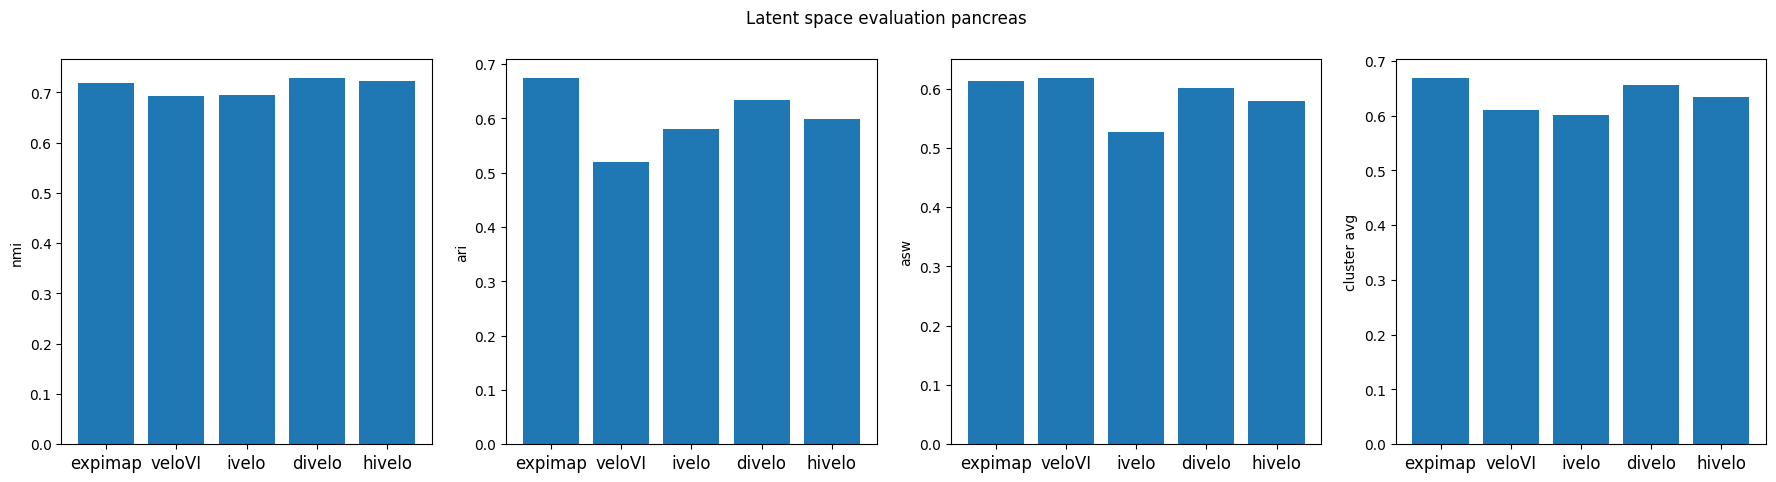

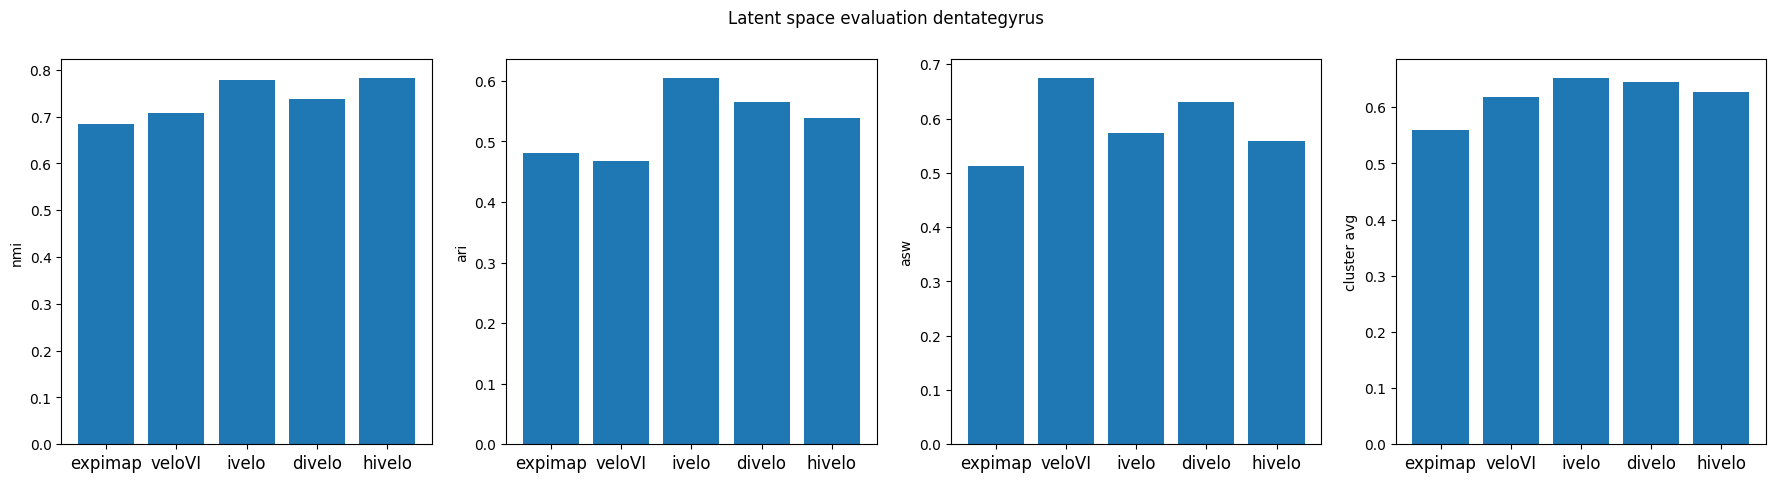

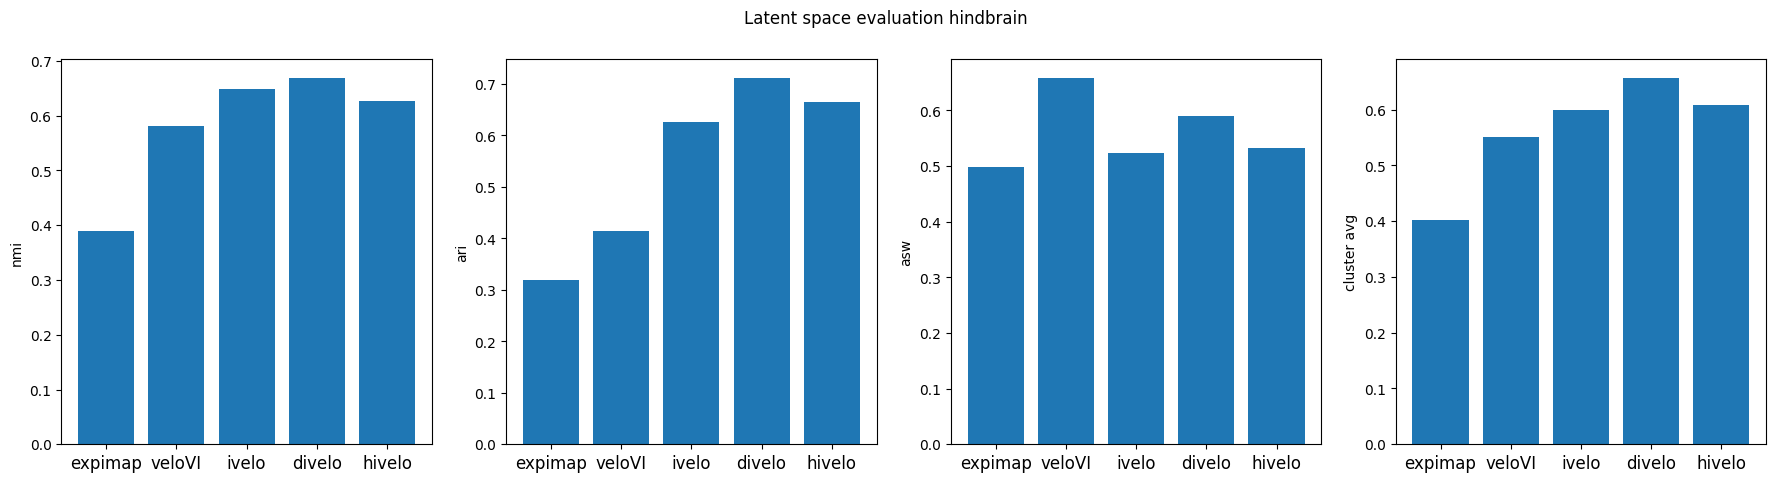

In [7]:
for dataset in datasets:
    latent_eval(dataset, latent_dict)



In [ ]:
#plot clust avg across all datasets and models

### Velocity analysis

In [8]:
mse_dict={}
for dataset in datasets:
    mse_dict[dataset]={}
    for model in models_MSE:
        with open('output/' + dataset + '/' + model + '/latent_analysis.pkl', 'rb') as f:
            model_dict = pickle.load(f)
            mse_dict[dataset][model]=model_dict


#### Log10 MSE score

In [35]:
mse_dict

{'pancreas': {'veloVI': {'nmi': 0.6927206956704883,
   'ari': 0.519094361660028,
   'asw': 0.6184656843543053,
   'vel_conf': index
   AAACCTGAGAGGGATA    0.901946
   AAACCTGAGCCTTGAT    0.904636
   AAACCTGAGGCAATTA    0.845362
   AAACCTGCATCATCCC    0.887605
   AAACCTGGTAAGTGGC    0.904577
                         ...   
   TTTGTCAAGTGACATA    0.847612
   TTTGTCAAGTGTGGCA    0.830645
   TTTGTCAGTTGTTTGG    0.862470
   TTTGTCATCGAATGCT    0.906333
   TTTGTCATCTGTTTGT    0.836582
   Name: velocity_confidence, Length: 3696, dtype: float64,
   'mean_vel_conf': 0.88365331037349,
   'clust_avg': (0.6100935805616072,),
   'metrics_avg': 0.6784835130145779,
   'adata': AnnData object with n_obs × n_vars = 3696 × 1074
       obs: 'clusters_coarse', 'clusters', 'S_score', 'G2M_score', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts'
       var: 'highly_variable_genes', 'gene_count_corr', 'means', 'dispersions', 'dispersions_norm', 'highly_variable', 'velocity_gamma',

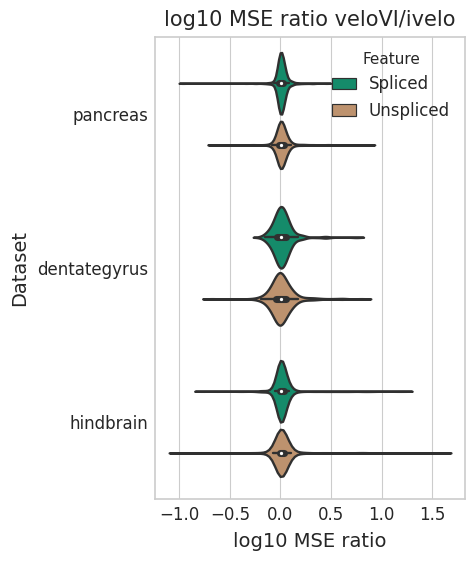

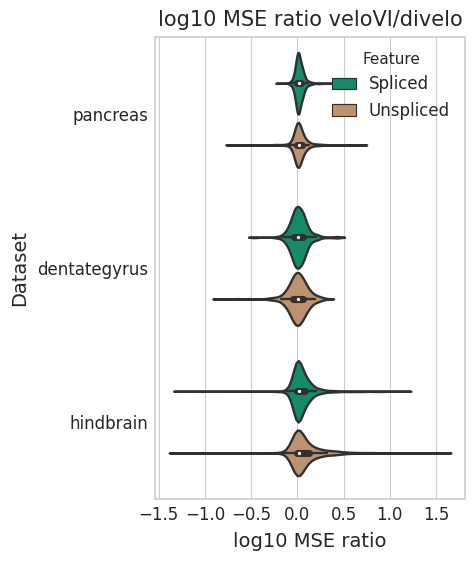

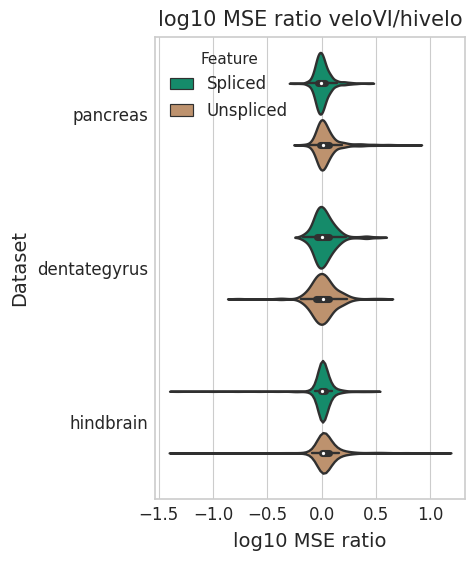

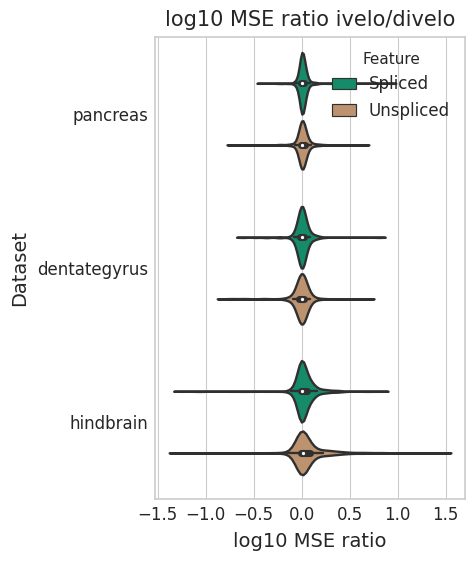

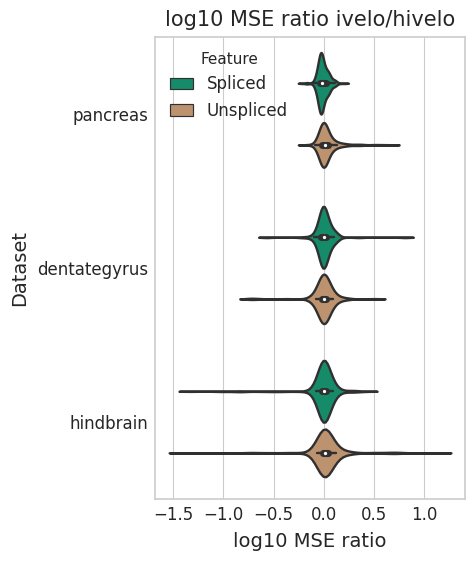

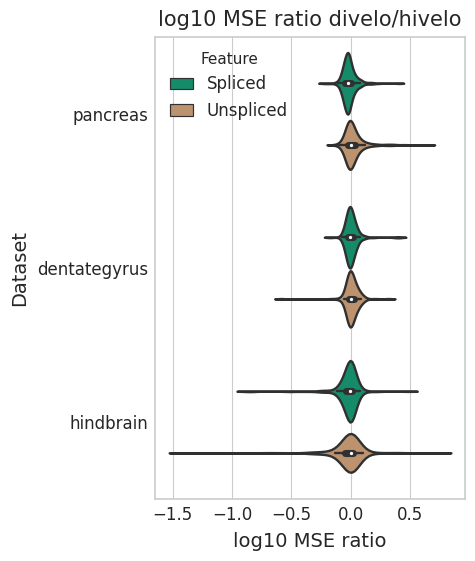

In [10]:
def log10MSE(datasets, model, model_compare, save=True):
    
    dfs = []

    for dataset in datasets:
        #Read in saved MSE 
        df_model=pd.read_csv("output/" + dataset + "/" + model + "/" + "MSE_.csv", index_col=0)
        df_model.index=df_model.index.str.upper()
        df_model_compare=pd.read_csv("output/" + dataset + "/" + model_compare + "/" + "MSE_.csv", index_col=0)
        df_model_compare.index=df_model_compare.index.str.upper()
        df=df_model.join(df_model_compare, rsuffix='_other', how='inner')


        s=np.log10(df["0"]/df["0_other"])
        u=np.log10(df["1"]/df["1_other"])

        mse_df = pd.DataFrame()

        mse_df["log10 MSE ratio"] = np.concatenate([s, u]).ravel()
        mse_df["Feature"] = ["Spliced"] * len(s) + ["Unspliced"] * len(u)
        
        mse_df["Dataset"] = dataset
        dfs.append(mse_df)

    mse_df = pd.concat(dfs, axis=0)

    with mplscience.style_context():
        sns.set_style(style="whitegrid")

        fig, ax = plt.subplots(figsize=(4, 6))
        sns.violinplot(
            data=mse_df,
            orient="h",
            ax=ax,
            y="Dataset",
            x="log10 MSE ratio",
            hue="Feature",
            palette=["#029e73", "#ca9161"],
        ).set(title='log10 MSE ratio ' + model + '/' + model_compare)


    if save:
        fig.savefig(
        "figures/comparison/logMSE_" + model + '_' + model_compare + ".png",
        transparent=True,
        bbox_inches='tight'
        )

log10MSE(datasets, models_MSE[0], models_MSE[1])
log10MSE(datasets, models_MSE[0], models_MSE[2])
log10MSE(datasets, models_MSE[0], models_MSE[3])
log10MSE(datasets, models_MSE[1], models_MSE[2])
log10MSE(datasets, models_MSE[1], models_MSE[3])
log10MSE(datasets, models_MSE[2], models_MSE[3])


In [11]:
vel_dict={}
for dataset in datasets:
    vel_dict[dataset]={}
    for model in models_velocity:
        with open('output/' + dataset + '/' + model + '/latent_analysis.pkl', 'rb') as f:
            model_dict = pickle.load(f)
            vel_dict[dataset][model]=model_dict

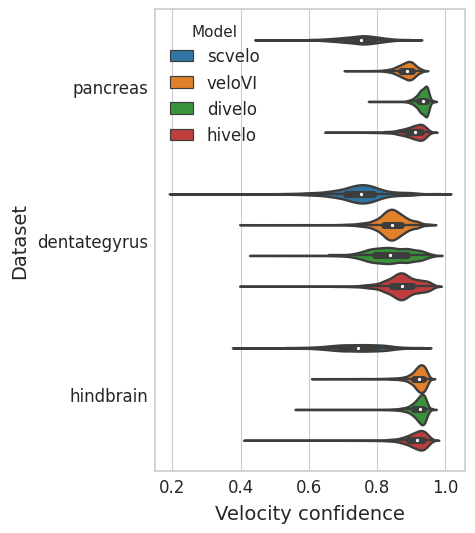

In [12]:
def vel_confidence(vel_dict, models_velocity, save=True):
    dfs=[]
    models=models_velocity
    for model in models:
        for dataset in vel_dict.keys():
            g_df=pd.DataFrame()
            g_df["Velocity confidence"] = vel_dict[dataset][model]["vel_conf"]#.to_numpy().ravel()
            g_df["Dataset"] = dataset
            g_df["Model"] = model
            dfs.append(g_df)

    conf_df = pd.concat(dfs, axis=0)


    with mplscience.style_context():
        sns.set_style(style="whitegrid")
        fig, ax = plt.subplots(figsize=(4, 6))
        sns.violinplot(
            data=conf_df,
            ax=ax,
            #orient="h",
            y="Dataset",
            x="Velocity confidence",
            hue="Model",
            #hue_order=["veloVI", "scVelo"],
            #palette=sns.color_palette(['#0173B2', '#DE8F05']),
        )
        if save:
            fig.savefig(
            "figures/comparison/velocity_confidence.png",
            transparent=True,
            bbox_inches='tight'
            )

            
vel_confidence(vel_dict, models_velocity)    

In [8]:
vel_dict

{'pancreas': {'scvelo': {'mean_vel_conf': 0.7478372109405659,
   'vel_conf': index
   AAACCTGAGAGGGATA    0.778356
   AAACCTGAGCCTTGAT    0.788395
   AAACCTGAGGCAATTA    0.735887
   AAACCTGCATCATCCC    0.737393
   AAACCTGGTAAGTGGC    0.777017
                         ...   
   TTTGTCAAGTGACATA    0.594083
   TTTGTCAAGTGTGGCA    0.722529
   TTTGTCAGTTGTTTGG    0.647998
   TTTGTCATCGAATGCT    0.806986
   TTTGTCATCTGTTTGT    0.695031
   Name: velocity_confidence, Length: 3696, dtype: float64,
   'adata': AnnData object with n_obs × n_vars = 3696 × 1074
       obs: 'clusters_coarse', 'clusters', 'S_score', 'G2M_score', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts', 'velocity_self_transition', 'velocity_length', 'velocity_confidence', 'velocity_confidence_transition', 'cluster'
       var: 'highly_variable_genes', 'gene_count_corr', 'means', 'dispersions', 'dispersions_norm', 'highly_variable', 'velocity_gamma', 'velocity_qreg_ratio', 'velocity_r2', 'velocity_

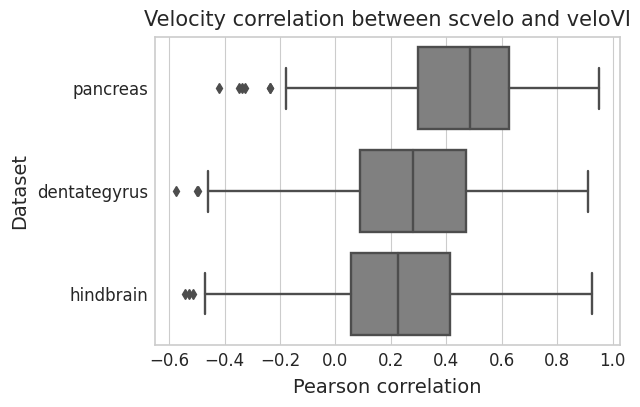

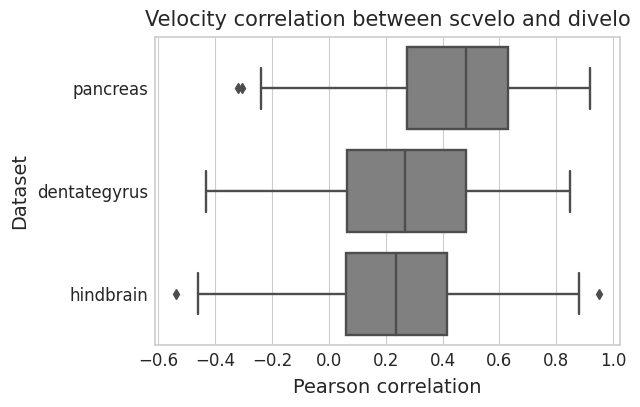

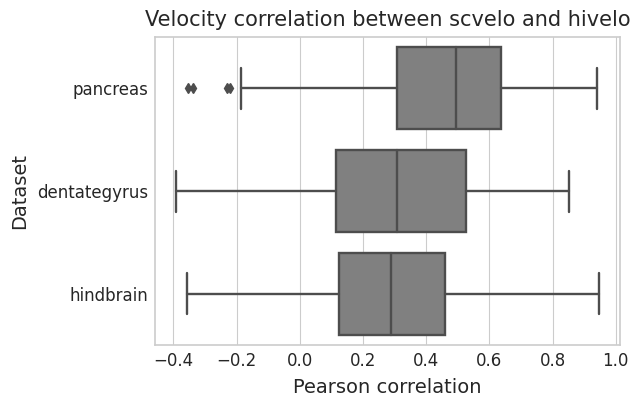

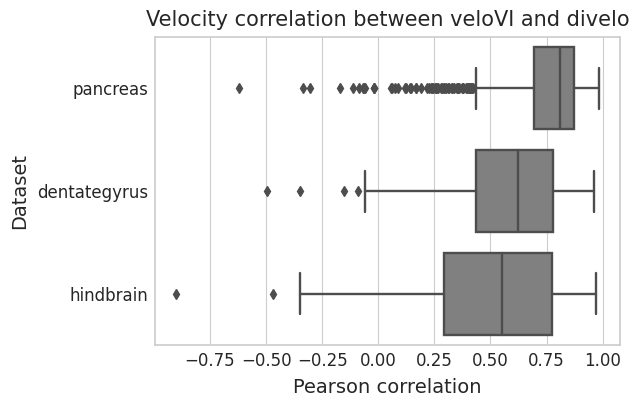

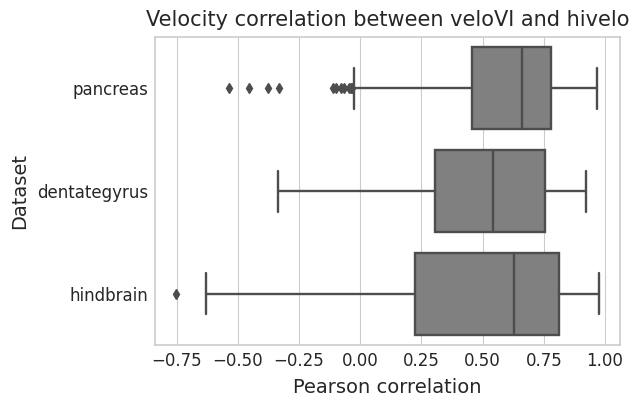

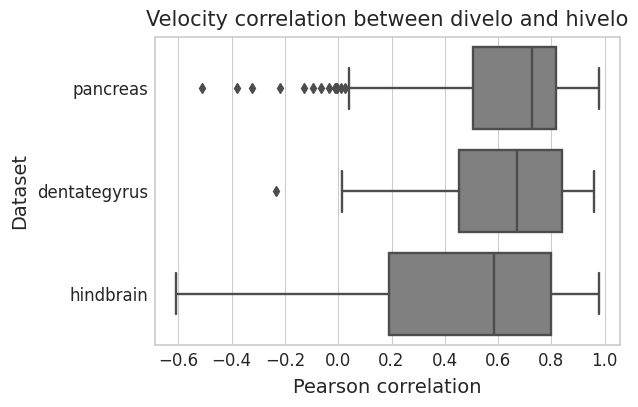

In [14]:
# velocity correlation
def vel_corr(vel_dict, model, model_compare, save=True):
    adatas=[]
    bdatas=[]
    datasets=vel_dict.keys()
    for dataset in datasets:
        adatas.append(vel_dict[dataset][model]["adata"])
        bdatas.append(vel_dict[dataset][model_compare]["adata"])
    correlations=[]
    name_long = []
    for a, b, n in zip(adatas, bdatas, datasets):
        a.var.index=a.var.index.str.upper()
        b.var.index=b.var.index.str.upper()
        index_match=list(set(a.var.index).intersection(set(b.var.index)))
        #print({model + "_" + model_compare + "_" + n:len(index_match)})
        a=a[:,index_match]
        b=b[:,index_match]
        
        corr_coeffs = np.corrcoef(a.to_df("velocity"), b.to_df("velocity"), rowvar=False)
        cross_corrs = np.diagonal(corr_coeffs[a.shape[1] :, : a.shape[1]])
        correlations.append(cross_corrs)
        name_long.append([n] * len(cross_corrs))
    velo_corr_df = pd.DataFrame()
    velo_corr_df["Pearson correlation"] = np.concatenate(correlations).ravel()
    velo_corr_df["Dataset"] = np.concatenate(name_long).ravel()
    
    with mplscience.style_context():
        sns.set_style(style="whitegrid")
        fig, ax = plt.subplots(figsize=(6, 4))
        ax.set_title('Velocity correlation between ' + model + " and " + model_compare)
        sns.boxplot(data=velo_corr_df, x="Pearson correlation", y="Dataset", color="grey", ax=ax)
    if save:
        fig.savefig(
        "figures/comparison" + "/" + model +"_" + model_compare +"pearson_correlation_velocity.png",
        transparent=True,
        bbox_inches='tight')

models_velocity=models_velocity_corr
vel_corr(vel_dict, models_velocity[0], models_velocity[1])
vel_corr(vel_dict, models_velocity[0], models_velocity[2])
vel_corr(vel_dict, models_velocity[0], models_velocity[3])
vel_corr(vel_dict, models_velocity[1], models_velocity[2])
vel_corr(vel_dict, models_velocity[1], models_velocity[3])
vel_corr(vel_dict, models_velocity[2], models_velocity[3])

In [10]:
vel_dict["pancreas"]["veloVI"]["adata"]

AnnData object with n_obs × n_vars = 3696 × 1074
    obs: 'clusters_coarse', 'clusters', 'S_score', 'G2M_score', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts'
    var: 'highly_variable_genes', 'gene_count_corr', 'means', 'dispersions', 'dispersions_norm', 'highly_variable', 'velocity_gamma', 'velocity_qreg_ratio', 'velocity_r2', 'velocity_genes', 'fit_alpha', 'fit_beta', 'fit_gamma', 'fit_t_', 'fit_scaling'
    uns: 'clusters_coarse_colors', 'clusters_colors', 'day_colors', 'neighbors', 'pca', 'velocity_params', '_scvi_uuid', '_scvi_manager_uuid'
    obsm: 'X_pca', 'X_umap'
    layers: 'Ms', 'Mu', 'spliced', 'unspliced', 'velocity', 'latent_time_velovi', 'fit_t'
    obsp: 'connectivities', 'distances'

In [8]:
vel_dict["pancreas"]["hivelo"]["adata"]

AnnData object with n_obs × n_vars = 3696 × 382
    obs: 'clusters_coarse', 'clusters', 'S_score', 'G2M_score', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts', 'velocity_self_transition', 'velocity_length', 'velocity_confidence', 'velocity_confidence_transition', 'cluster'
    var: 'highly_variable_genes', 'gene_count_corr', 'means', 'dispersions', 'dispersions_norm', 'highly_variable', 'velocity_gamma', 'velocity_qreg_ratio', 'velocity_r2', 'velocity_genes'
    uns: 'clusters_coarse_colors', 'clusters_colors', 'day_colors', 'neighbors', 'pca', 'velocity_params', '_scvi_uuid', '_scvi_manager_uuid', 'velocity_graph', 'velocity_graph_neg', 'umap', 'leiden'
    obsm: 'X_pca', 'X_umap', 'X_hivelo_opt_all'
    layers: 'Ms', 'Mu', 'spliced', 'unspliced', 'velocity', 'latent_time_velovi'
    obsp: 'connectivities', 'distances'

### Case study: Pancreas

Gene-specific velocity analysis

In [27]:
def genewise_vel_pancreas(genes, vel_dict, model, model_compare, save=True):
    adata=vel_dict["pancreas"][model]["adata"]
    bdata=vel_dict["pancreas"][model_compare]["adata"]

    palette = dict(zip(adata.obs['clusters'].cat.categories, adata.uns['clusters_colors']))

    for gene in genes:
        print(f"Correlation {gene}: {np.corrcoef(adata.to_df('velocity')[gene], bdata.to_df('velocity')[gene])[0, 1]}")

        with mplscience.style_context():
            fig, ax = plt.subplots(figsize=(4, 4))


            df = pd.DataFrame()
            df["Unspliced"] = adata.to_df("Mu")[gene]
            df["Spliced"] = bdata.to_df("Ms")[gene]
            df["clusters"] = adata.obs.clusters
            sns.scatterplot(
                x="Spliced",
                y="Unspliced",
                data=df,
                hue="clusters",
                s=5,
                ax=ax,
                palette=palette,
            );

            ax.axis('off')
            ax.get_legend().remove()

        if save:
            fig.savefig(
                "figures" + "/" + 'pancreas' + "/" + 'comparison' + "/" + f'phase_portrait_pancreas_{gene}.png',
                transparent=True,
                bbox_inches='tight'
            )

        with mplscience.style_context():
            sns.set_style(style="whitegrid")
            fig, ax = plt.subplots(figsize=(6, 4))
            ax.axis('off')
            left, width = 0.1, 0.65
            bottom, height = 0.1, 0.65
            spacing = 0.015
            rect_scatter = [left, bottom, width, height]
            rect_histx = [left, bottom + height + spacing, width, 0.1]
            rect_histy = [left + width + spacing, bottom, 0.1, height]

            ax = fig.add_axes(rect_scatter)
            ax_histx = fig.add_axes(rect_histx, sharex=ax)
            ax_histy = fig.add_axes(rect_histy, sharey=ax)
            ax_histx.axis("off")
            ax_histy.axis("off")

            df = pd.DataFrame()
            df[model + " velocity"] = adata.to_df("velocity")[gene]
            df[model_compare + " velocity"] = bdata.to_df("velocity")[gene]
            df["clusters"] = adata.obs.clusters
            clipy = (df[model + " velocity"].min(), df[model + " velocity"].max())
            clipx = (df[model_compare + " velocity"].min(), df[model_compare + " velocity"].max())
            sns.kdeplot(
                data=df,
                y=model + " velocity",
                hue="clusters",
                ax=ax_histy,
                legend=False,
                clip=clipy,
                palette=palette,
            )
            sns.kdeplot(
                data=df,
                x=model_compare + " velocity",
                hue="clusters",
                ax=ax_histx,
                legend=False,
                clip=clipx,
                palette=palette,
            )
            sns.scatterplot(
                y=model + " velocity",
                x=model_compare + " velocity",
                data=df,
                hue="clusters",
                s=4,
                palette=palette,
                ax=ax,
                legend=False
            )

            
        if save:
            fig.savefig(
                "figures" + "/" + "pancreas" + "/" + 'comparison' + "/" + f'velocity_comparison_{model}_{model_compare}_{gene}.png',
                transparent=True,
                bbox_inches='tight'
            )

In [18]:
models_velocity

['scvelo', 'veloVI', 'divelo', 'hivelo']

In [33]:
set(vel_dict["pancreas"]["hivelo"]["adata"].var.index)

{'AACS',
 'ABAT',
 'ABCA1',
 'ABCC8',
 'ACADSB',
 'ACAT1',
 'ACLY',
 'ACSL1',
 'ACTN4',
 'ACVR1C',
 'ACYP2',
 'ADK',
 'ANPEP',
 'ARFGAP3',
 'ARG1',
 'ASF1B',
 'ASS1',
 'ATF3',
 'ATG4A',
 'ATP2A2',
 'ATP2A3',
 'ATP2B1',
 'ATP6V1B2',
 'BACE2',
 'BAG4',
 'BAZ1A',
 'BCKDHA',
 'BCL2',
 'BDNF',
 'BIRC5',
 'BLNK',
 'BMP7',
 'BUB1B',
 'C1GALT1',
 'CACNA1A',
 'CACNA1C',
 'CACNA1D',
 'CACNA2D1',
 'CACNG4',
 'CALCOCO1',
 'CAMK2B',
 'CAT',
 'CCL4',
 'CCNB1',
 'CCNB2',
 'CCND1',
 'CCND2',
 'CCNE2',
 'CD47',
 'CDC14B',
 'CDC20',
 'CDC25B',
 'CDC25C',
 'CDH1',
 'CDH2',
 'CDH23',
 'CDK1',
 'CDK6',
 'CDK8',
 'CDKN1A',
 'CDKN1C',
 'CHAF1A',
 'CHAF1B',
 'CHD7',
 'CHGA',
 'CHRM3',
 'CLDN10',
 'CNOT6L',
 'CNTFR',
 'CNTN1',
 'COL18A1',
 'CPE',
 'CPM',
 'CPN1',
 'CRHR2',
 'CTNNA2',
 'CTNNA3',
 'CXCL12',
 'CXXC4',
 'CYP7B1',
 'DAB1',
 'DACT2',
 'DBF4',
 'DDC',
 'DEPTOR',
 'DGKB',
 'DHFR',
 'DLG4',
 'DLK1',
 'DLL1',
 'DLL3',
 'DNAJC6',
 'DNER',
 'DNM1',
 'DNM2',
 'DNMT1',
 'DNMT3A',
 'DTYMK',
 'DUSP10',
 'DUSP

Correlation TOP2A: 0.4731913046893962
Correlation TOP2A: 0.5023877397776414
Correlation TOP2A: 0.31090736074945824
Correlation TOP2A: 0.9193815614724568
Correlation TOP2A: 0.7638312377904688
Correlation TOP2A: 0.8173309146812379


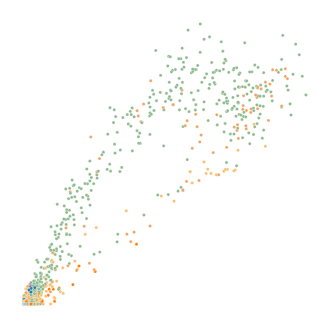

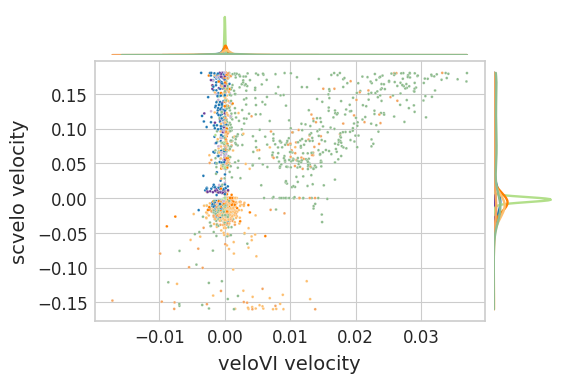

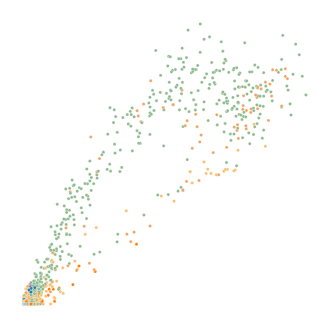

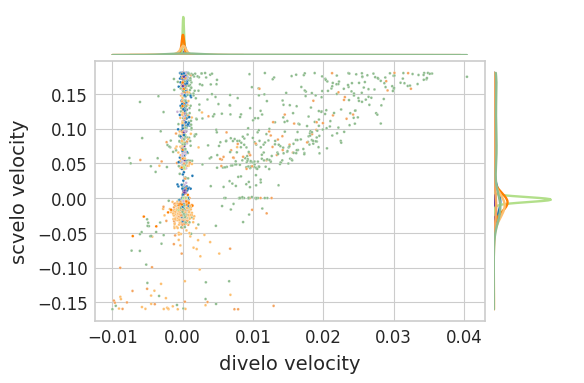

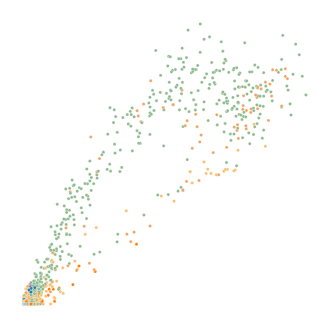

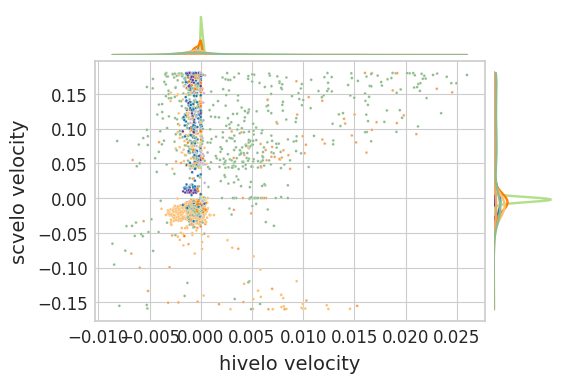

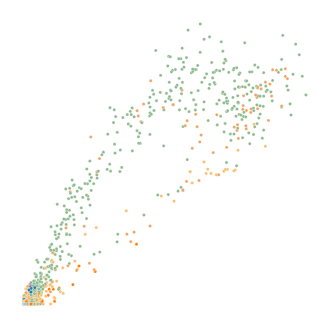

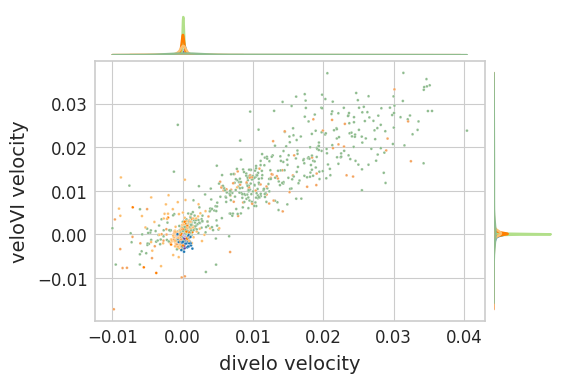

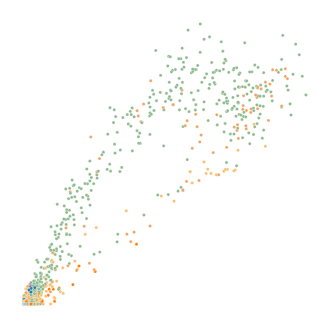

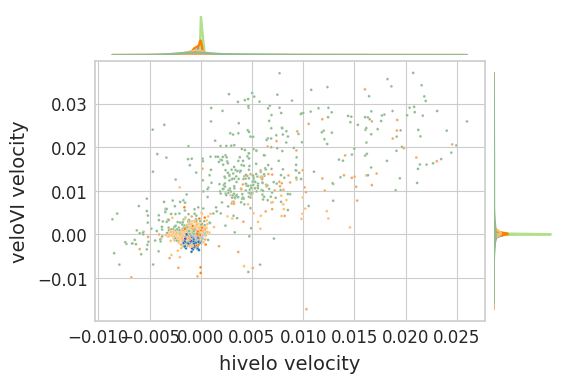

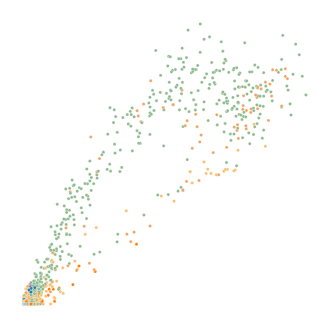

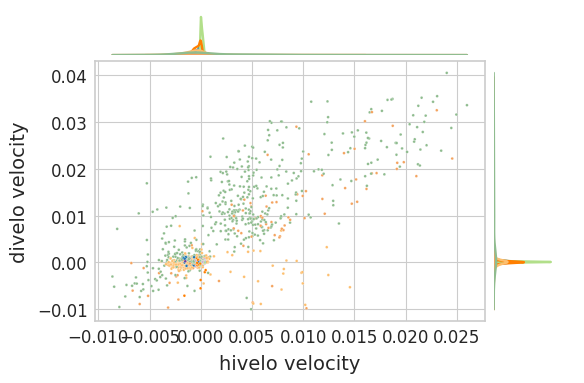

In [34]:
genes = ['TOP2A']
genewise_vel_pancreas(genes, vel_dict, models_velocity[0], models_velocity[1])
genewise_vel_pancreas(genes, vel_dict, models_velocity[0], models_velocity[2])
genewise_vel_pancreas(genes, vel_dict, models_velocity[0], models_velocity[3])
genewise_vel_pancreas(genes, vel_dict, models_velocity[1], models_velocity[2])
genewise_vel_pancreas(genes, vel_dict, models_velocity[1], models_velocity[3])
genewise_vel_pancreas(genes, vel_dict, models_velocity[2], models_velocity[3])

### GP Analysis

In [8]:
#load dicts
GP_dict={}
for model in models_GP:
    with open('output/' + dataset + '/' + model + '/GP_analysis.pkl', 'rb') as f:
        model_dict = pickle.load(f)
        GP_dict[model]=model_dict


In [15]:
#plot no of sig GPs per cell

#expimap
models=list(GP_dict.keys())
cell_types=list(GP_dict[models[0]].keys())[:-1]
                        
no_sig_GPs_1=[len(GP_dict[models[0]][ct]["terms"]) for ct in cell_types]
no_sig_GPs_2=[len(GP_dict[models[1]][ct]["terms"]) for ct in cell_types]
no_sig_GPs_3=[len(GP_dict[models[2]][ct]["terms"]) for ct in cell_types]

X_axis = np.arange(len(cell_types))

plt.figure(figsize=(15, 5))
plt.xticks(X_axis, cell_types, rotation = 45)

#add comparison of mult models
plt.title("no. significant GPs per cell for each model")
plt.bar(X_axis - 0.2, no_sig_GPs_1, 0.2, label = models[0])
plt.bar(X_axis, no_sig_GPs_2, 0.2, label = models[1])
plt.bar(X_axis + 0.2, no_sig_GPs_3, 0.2, label = models[2])
plt.legend()
plt.savefig("figures/" + dataset + "/comparison/number_sig_GPs")

NameError: name 'GP_dict' is not defined

In [ ]:
#Distribution of bfs for significant GPs - histogram for each model (x axis is bf scores across cells)
sig_bf_scores=[]
for ct in cell_types:
    sig_bf_scores.append(GP_dict[)
    

#### Plot XGBoost accuracy

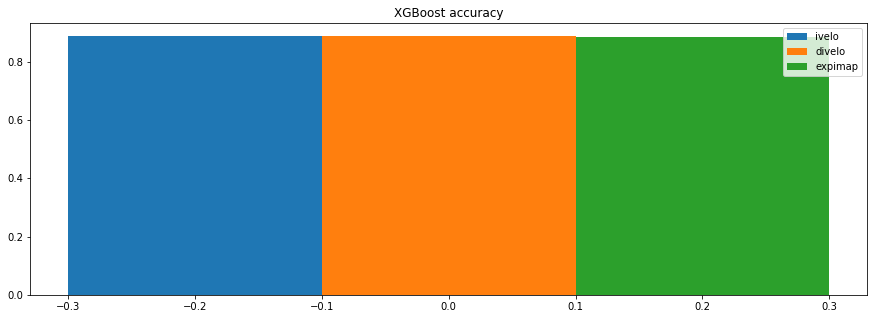

In [12]:
#Plot XGBoost accuracy
models= list(GP_dict.keys())
X_axis = np.arange(len(datasets))

plt.figure(figsize=(15, 5))

plt.title("XGBoost accuracy")
plt.bar(X_axis - 0.2, GP_dict[models[0]]["XGB_acc"], 0.2, label = models[0])
plt.bar(X_axis, GP_dict[models[1]]["XGB_acc"], 0.2, label = models[1])
plt.bar(X_axis + 0.2, GP_dict[models[2]]["XGB_acc"], 0.2, label = models[2])
plt.legend()
plt.savefig("figures/" + dataset + "/comparison/XGB_accuracy")

#### Plot individual accuracies

In [ ]:
#Distribution of bfs - histogram for each model (x axis is bf scores across cells)

cell_types=list(divelo.keys())
fig = plt.figure(figsize=(20, 20))
fig.suptitle('Distibution of Bayes factors for each cell type', fontsize=16)

for i, ct in enumerate(cell_types):
    
    plt.subplot(3,2,i+1)
    plt.xlabel("accuracy")
    plt.title(f"{ct}")
    
    idx_expimap = [list(expimap[ct]["terms"]).index(term) for term in shared_GPs[ct]]
    idx_ivelo = [list(ivelo[ct]["terms"]).index(term) for term in shared_GPs[ct]]
    idx_divelo = [list(divelo[ct]["terms"]).index(term) for term in shared_GPs[ct]]
    
    ind = np.arange(len(shared_GPs[ct]))

    
    plt.yticks(ind, shared_GPs[ct])

    xvals_expimap = [expimap[ct]["SVM_acc"][i] for i in idx_expimap]
    #xvals_ivelo = [ivelo[ct]["SVM_acc"][i] for i in idx_ivelo] 
    xvals_divelo = [divelo[ct]["SVM_acc"][i] for i in idx_divelo] 
    plt.barh(ind-0.1, height=0.1, width = xvals_expimap, label="expimap")
    #plt.barh(ind, height=0.1, width = xvals_ivelo, label="ivelo")
    plt.barh(ind+0.1, height=0.1, width = xvals_divelo, label="divelo")
    plt.xticks(np.arange(0, 1, 0.05))
    plt.legend()
    plt.savefig("figures/GP_comparison/SVM_accuracy_shared2")

In [74]:
shared_GPs={}
expimap_terms=[]
ivelo_terms=[]
divelo_terms=[]
for ct in expimap.keys():
    shared_set=set(expimap[ct]["terms"]).intersection(set(ivelo[ct]["terms"]), set(divelo[ct]["terms"]))
    #hared_set=set(expimap[ct]["terms"]).intersection(set(divelo[ct]["terms"]))
    expimap_terms.append(expimap[ct]["terms"])
    ivelo_terms.append(ivelo_terms[ct]["terms"])
    divelo_terms.append(divelo_terms[ct]["terms"])                    
    if bool(shared_set):
        shared_GPs[ct]=list(shared_set)
        
        
print(f"shared_GPs: {shared_GPs}")
print(f"expimap_terms: {expimap_terms}")
print(f"ivelo_terms: {ivelo_terms}")
print(f"divelo_terms: {divelo_terms}")
                            

TypeError: list indices must be integers or slices, not str

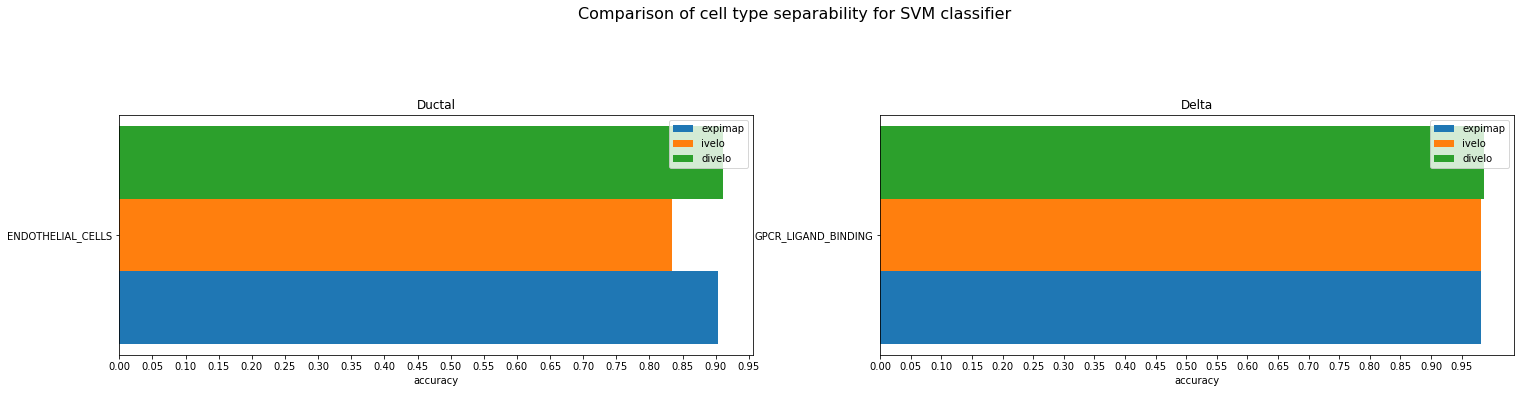

In [67]:
shared_GPs={}
for ct in expimap.keys():
    shared_set=set(expimap[ct]["terms"]).intersection(set(ivelo[ct]["terms"]), set(divelo[ct]["terms"]))
    #hared_set=set(expimap[ct]["terms"]).intersection(set(divelo[ct]["terms"]))
    if bool(shared_set):
        shared_GPs[ct]=list(shared_set)

#shared GPs
#plot accuracies per cell
cell_types=list(shared_GPs.keys())
fig = plt.figure(figsize=(25, 15))
fig.suptitle('Comparison of cell type separability for SVM classifier', fontsize=16)

for i, ct in enumerate(cell_types):
    
    plt.subplot(3,2,i+1)
    plt.xlabel("accuracy")
    plt.title(f"{ct}")
    
    idx_expimap = [list(expimap[ct]["terms"]).index(term) for term in shared_GPs[ct]]
    idx_ivelo = [list(ivelo[ct]["terms"]).index(term) for term in shared_GPs[ct]]
    idx_divelo = [list(divelo[ct]["terms"]).index(term) for term in shared_GPs[ct]]
    
    ind = np.arange(len(shared_GPs[ct]))

    
    plt.yticks(ind, shared_GPs[ct])

    xvals_expimap = [expimap[ct]["SVM_acc"][i] for i in idx_expimap]
    xvals_ivelo = [ivelo[ct]["SVM_acc"][i] for i in idx_ivelo] 
    xvals_divelo = [divelo[ct]["SVM_acc"][i] for i in idx_divelo] 
    plt.barh(ind-0.1, height=0.1, width = xvals_expimap, label="expimap")
    plt.barh(ind, height=0.1, width = xvals_ivelo, label="ivelo")
    plt.barh(ind+0.1, height=0.1, width = xvals_divelo, label="divelo")
    plt.xticks(np.arange(0, 1, 0.05))
    plt.legend()
    plt.savefig("figures/GP_comparison/SVM_accuracy_1")

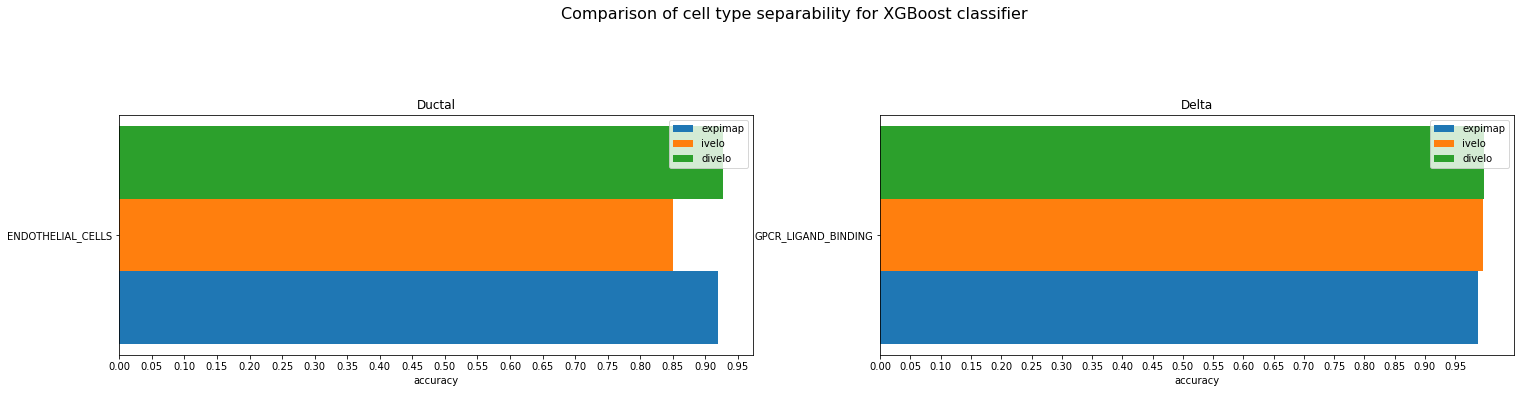

In [70]:
shared_GPs={}
for ct in expimap.keys():
    shared_set=set(expimap[ct]["terms"]).intersection(set(ivelo[ct]["terms"]), set(divelo[ct]["terms"]))
    #hared_set=set(expimap[ct]["terms"]).intersection(set(divelo[ct]["terms"]))
    if bool(shared_set):
        shared_GPs[ct]=list(shared_set)

#shared GPs
#plot accuracies per cell
cell_types=list(shared_GPs.keys())
fig = plt.figure(figsize=(25, 15))
fig.suptitle('Comparison of cell type separability for XGBoost classifier', fontsize=16)

for i, ct in enumerate(cell_types):
    
    plt.subplot(3,2,i+1)
    plt.xlabel("accuracy")
    plt.title(f"{ct}")
    
    idx_expimap = [list(expimap[ct]["terms"]).index(term) for term in shared_GPs[ct]]
    idx_ivelo = [list(ivelo[ct]["terms"]).index(term) for term in shared_GPs[ct]]
    idx_divelo = [list(divelo[ct]["terms"]).index(term) for term in shared_GPs[ct]]
    
    ind = np.arange(len(shared_GPs[ct]))

    
    plt.yticks(ind, shared_GPs[ct])

    xvals_expimap = [expimap[ct]["XGB_acc"][i] for i in idx_expimap]
    xvals_ivelo = [ivelo[ct]["XGB_acc"][i] for i in idx_ivelo] 
    xvals_divelo = [divelo[ct]["XGB_acc"][i] for i in idx_divelo] 
    plt.barh(ind-0.1, height=0.1, width = xvals_expimap, label="expimap")
    plt.barh(ind, height=0.1, width = xvals_ivelo, label="ivelo")
    plt.barh(ind+0.1, height=0.1, width = xvals_divelo, label="divelo")
    plt.xticks(np.arange(0, 1, 0.05))
    plt.legend()
    plt.savefig("figures/GP_comparison/XGB_accuracy_1")

In [60]:
#### Comparison divelo and expimap

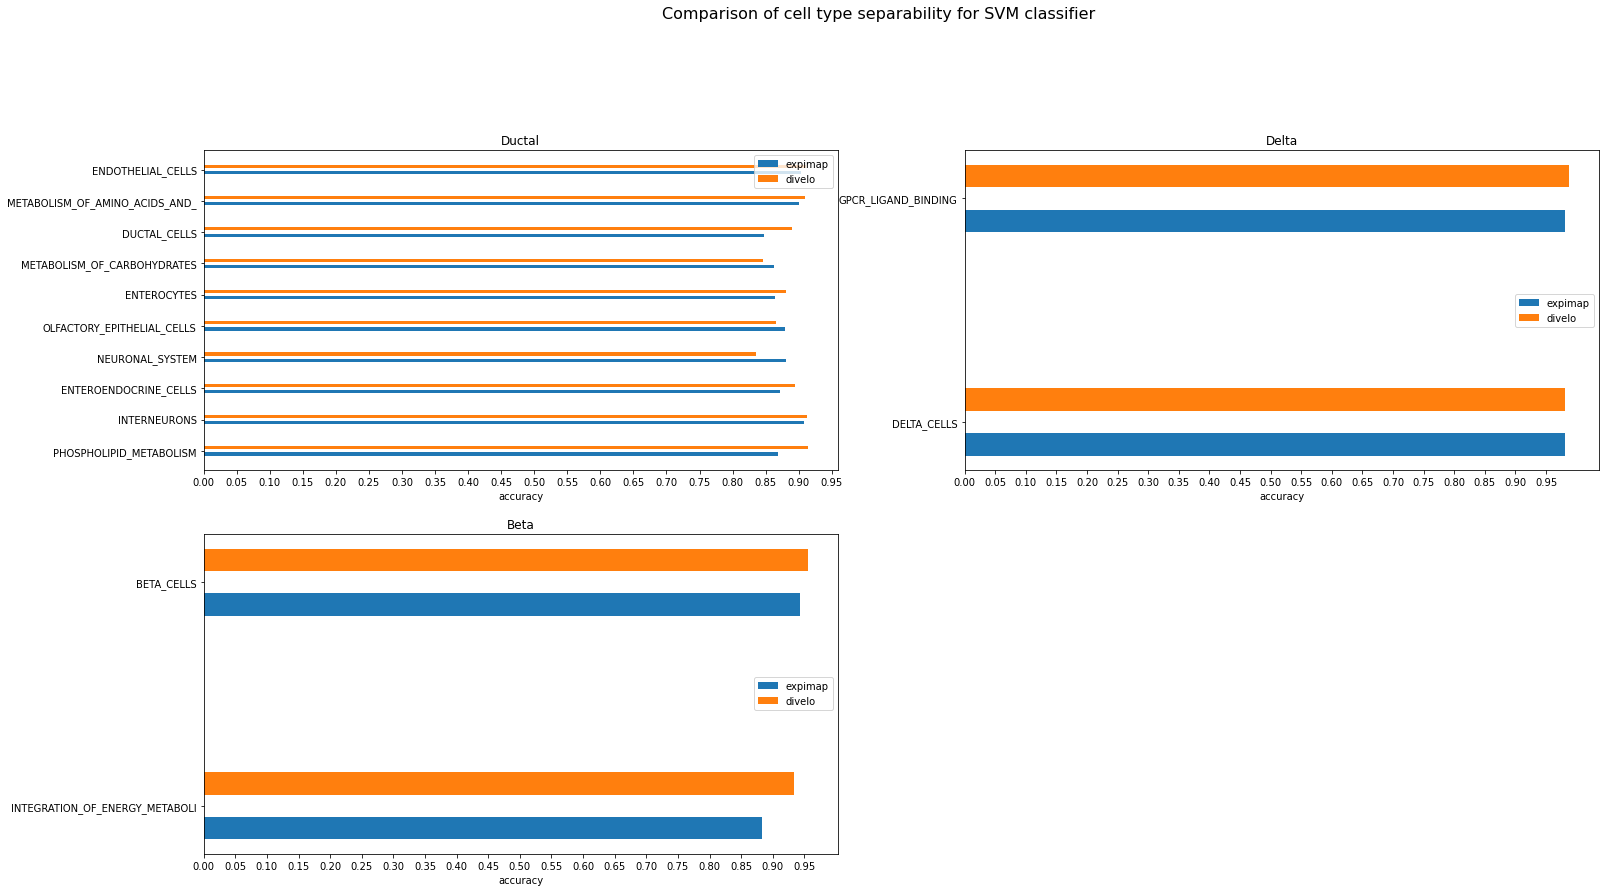

In [69]:
shared_GPs={}
for ct in expimap.keys():
    #shared_set=set(expimap[ct]["terms"]).intersection(set(ivelo[ct]["terms"]), set(divelo[ct]["terms"]))
    shared_set=set(expimap[ct]["terms"]).intersection(set(divelo[ct]["terms"]))
    if bool(shared_set):
        shared_GPs[ct]=list(shared_set)
        
#shared GPs
#plot accuracies per cell
cell_types=list(shared_GPs.keys())
fig = plt.figure(figsize=(25, 20))
fig.suptitle('Comparison of cell type separability for SVM classifier', fontsize=16)

for i, ct in enumerate(cell_types):
    
    plt.subplot(3,2,i+1)
    plt.xlabel("accuracy")
    plt.title(f"{ct}")
    
    idx_expimap = [list(expimap[ct]["terms"]).index(term) for term in shared_GPs[ct]]
    #idx_ivelo = [list(ivelo[ct]["terms"]).index(term) for term in shared_GPs[ct]]
    idx_divelo = [list(divelo[ct]["terms"]).index(term) for term in shared_GPs[ct]]
    
    ind = np.arange(len(shared_GPs[ct]))

    
    plt.yticks(ind, shared_GPs[ct])

    xvals_expimap = [expimap[ct]["SVM_acc"][i] for i in idx_expimap]
    #xvals_ivelo = [ivelo[ct]["SVM_acc"][i] for i in idx_ivelo] 
    xvals_divelo = [divelo[ct]["SVM_acc"][i] for i in idx_divelo] 
    plt.barh(ind-0.1, height=0.1, width = xvals_expimap, label="expimap")
    #plt.barh(ind, height=0.1, width = xvals_ivelo, label="ivelo")
    plt.barh(ind+0.1, height=0.1, width = xvals_divelo, label="divelo")
    plt.xticks(np.arange(0, 1, 0.05))
    plt.legend()
    plt.savefig("figures/GP_comparison/SVM_accuracy_2")

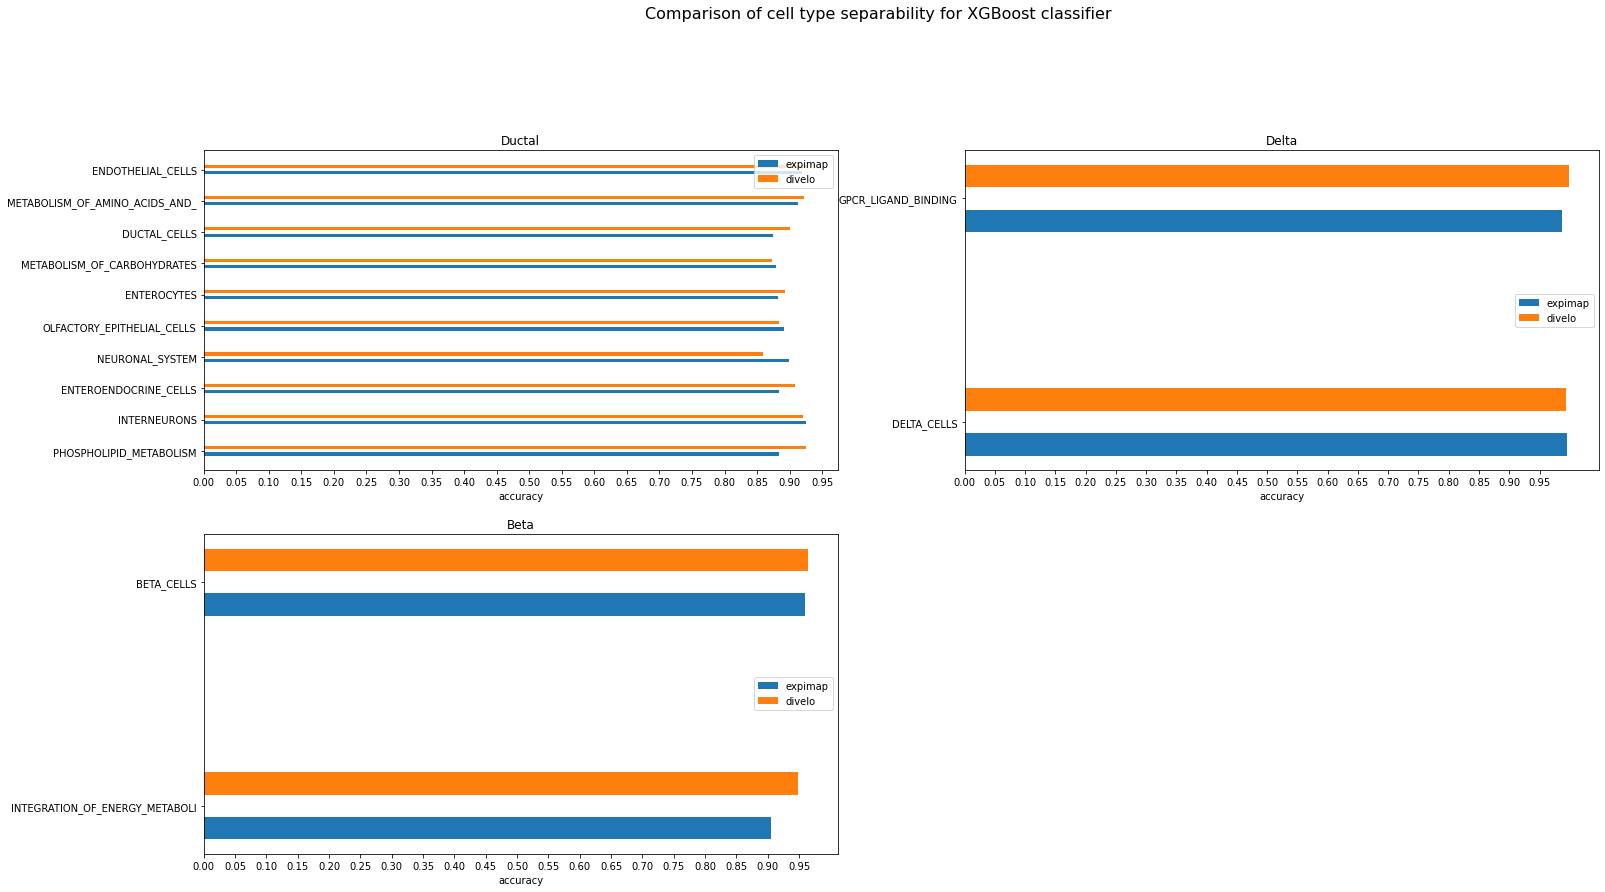

In [71]:
shared_GPs={}
for ct in expimap.keys():
    #shared_set=set(expimap[ct]["terms"]).intersection(set(ivelo[ct]["terms"]), set(divelo[ct]["terms"]))
    shared_set=set(expimap[ct]["terms"]).intersection(set(divelo[ct]["terms"]))
    if bool(shared_set):
        shared_GPs[ct]=list(shared_set)
        
#shared GPs
#plot accuracies per cell
cell_types=list(shared_GPs.keys())
fig = plt.figure(figsize=(25, 20))
fig.suptitle('Comparison of cell type separability for XGBoost classifier', fontsize=16)

for i, ct in enumerate(cell_types):
    
    plt.subplot(3,2,i+1)
    plt.xlabel("accuracy")
    plt.title(f"{ct}")
    
    idx_expimap = [list(expimap[ct]["terms"]).index(term) for term in shared_GPs[ct]]
    #idx_ivelo = [list(ivelo[ct]["terms"]).index(term) for term in shared_GPs[ct]]
    idx_divelo = [list(divelo[ct]["terms"]).index(term) for term in shared_GPs[ct]]
    
    ind = np.arange(len(shared_GPs[ct]))

    
    plt.yticks(ind, shared_GPs[ct])

    xvals_expimap = [expimap[ct]["XGB_acc"][i] for i in idx_expimap]
    #xvals_ivelo = [ivelo[ct]["SVM_acc"][i] for i in idx_ivelo] 
    xvals_divelo = [divelo[ct]["XGB_acc"][i] for i in idx_divelo] 
    plt.barh(ind-0.1, height=0.1, width = xvals_expimap, label="expimap")
    #plt.barh(ind, height=0.1, width = xvals_ivelo, label="ivelo")
    plt.barh(ind+0.1, height=0.1, width = xvals_divelo, label="divelo")
    plt.xticks(np.arange(0, 1, 0.05))
    plt.legend()
    plt.savefig("figures/GP_comparison/XGB_accuracy_2")

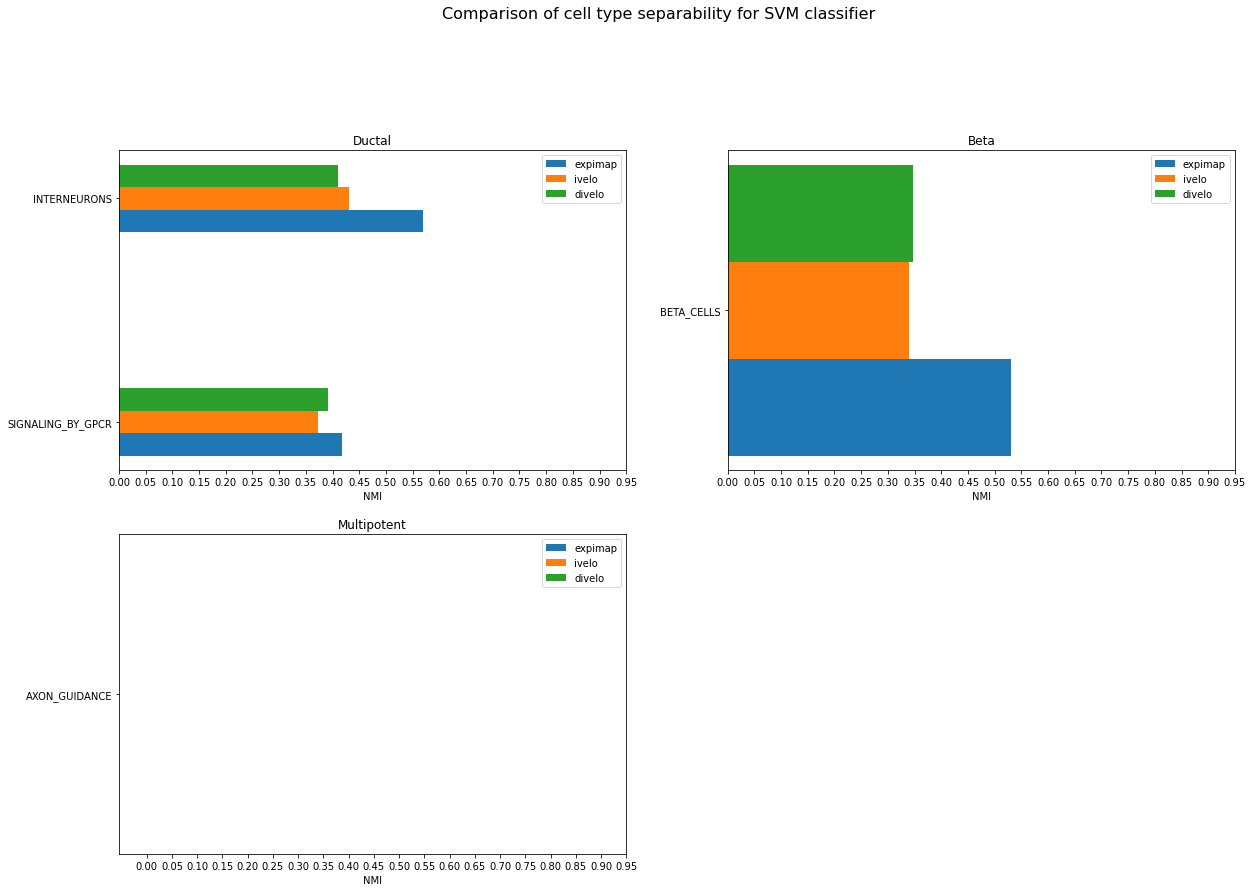

In [82]:
#shared GPs
#plot NMI per cell
cell_types=list(shared_GPs.keys())
fig = plt.figure(figsize=(20, 20))
fig.suptitle('Comparison of cell type separability for SVM classifier', fontsize=16)

for i, ct in enumerate(cell_types):
    
    plt.subplot(3,2,i+1)
    plt.xlabel("NMI")
    plt.title(f"{ct}")
    
    idx_expimap = [list(expimap[ct]["terms"]).index(term) for term in shared_GPs[ct]]
    idx_ivelo = [list(ivelo[ct]["terms"]).index(term) for term in shared_GPs[ct]]
    idx_divelo = [list(divelo[ct]["terms"]).index(term) for term in shared_GPs[ct]]
    
    ind = np.arange(len(shared_GPs[ct]))

    
    plt.yticks(ind, shared_GPs[ct])

    xvals_expimap = [expimap[ct]["SVM_NMI"][i] for i in idx_expimap]
    xvals_ivelo = [ivelo[ct]["SVM_NMI"][i] for i in idx_ivelo] 
    xvals_divelo = [divelo[ct]["SVM_NMI"][i] for i in idx_divelo] 
    plt.barh(ind-0.1, height=0.1, width = xvals_expimap, label="expimap")
    plt.barh(ind, height=0.1, width = xvals_ivelo, label="ivelo")
    plt.barh(ind+0.1, height=0.1, width = xvals_divelo, label="divelo")
    plt.xticks(np.arange(0, 1, 0.05))
    plt.legend()
    plt.savefig("figures/GP_comparison/SVM_NMI_shared")

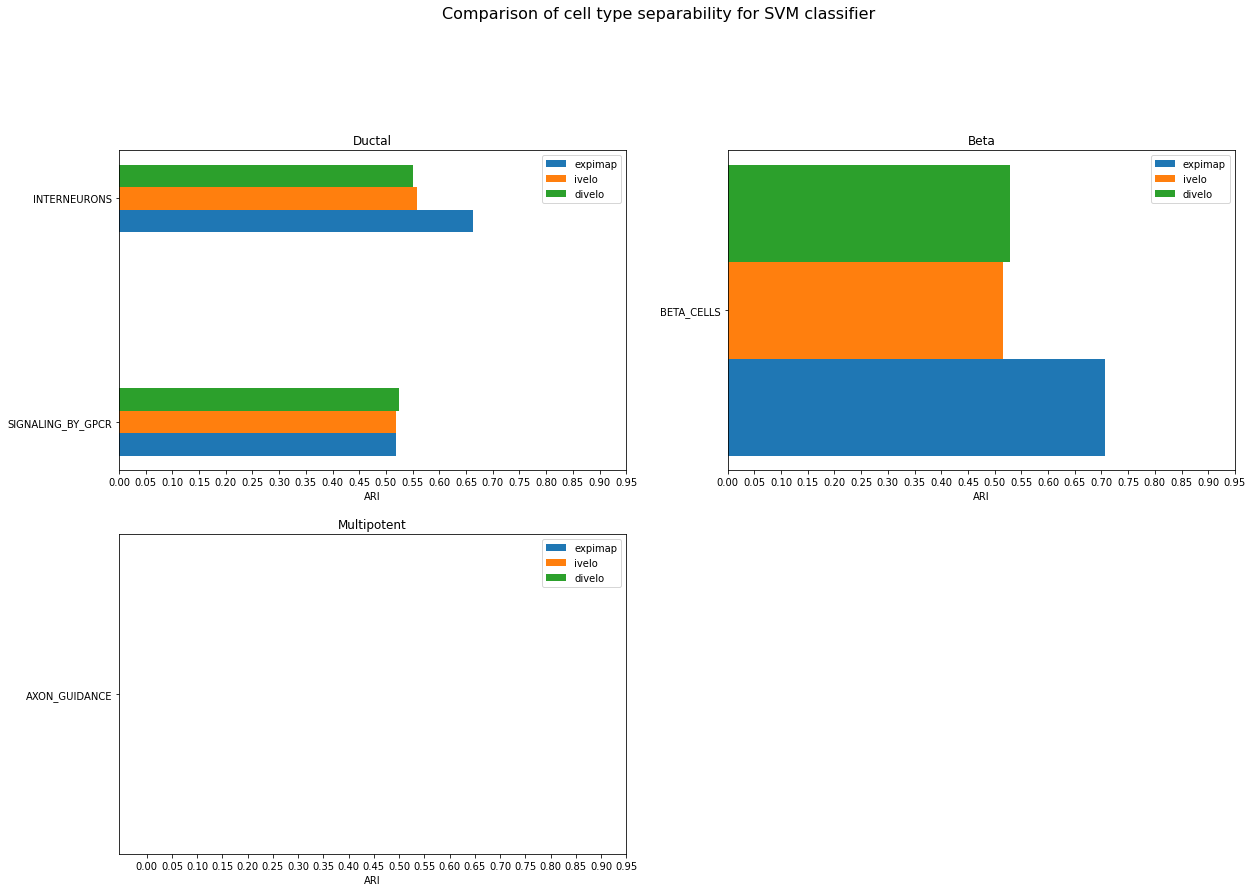

In [83]:
#shared GPs
#plot NMI per cell
cell_types=list(shared_GPs.keys())
fig = plt.figure(figsize=(20, 20))
fig.suptitle('Comparison of cell type separability for SVM classifier', fontsize=16)

for i, ct in enumerate(cell_types):
    
    plt.subplot(3,2,i+1)
    plt.xlabel("ARI")
    plt.title(f"{ct}")
    
    idx_expimap = [list(expimap[ct]["terms"]).index(term) for term in shared_GPs[ct]]
    idx_ivelo = [list(ivelo[ct]["terms"]).index(term) for term in shared_GPs[ct]]
    idx_divelo = [list(divelo[ct]["terms"]).index(term) for term in shared_GPs[ct]]
    
    ind = np.arange(len(shared_GPs[ct]))

    
    plt.yticks(ind, shared_GPs[ct])

    xvals_expimap = [expimap[ct]["SVM_ARI"][i] for i in idx_expimap]
    xvals_ivelo = [ivelo[ct]["SVM_ARI"][i] for i in idx_ivelo] 
    xvals_divelo = [divelo[ct]["SVM_ARI"][i] for i in idx_divelo] 
    plt.barh(ind-0.1, height=0.1, width = xvals_expimap, label="expimap")
    plt.barh(ind, height=0.1, width = xvals_ivelo, label="ivelo")
    plt.barh(ind+0.1, height=0.1, width = xvals_divelo, label="divelo")
    plt.xticks(np.arange(0, 1, 0.05))
    plt.legend()
    plt.savefig("figures/GP_comparison/SVM_ARI_shared")

IndexError: list index out of range

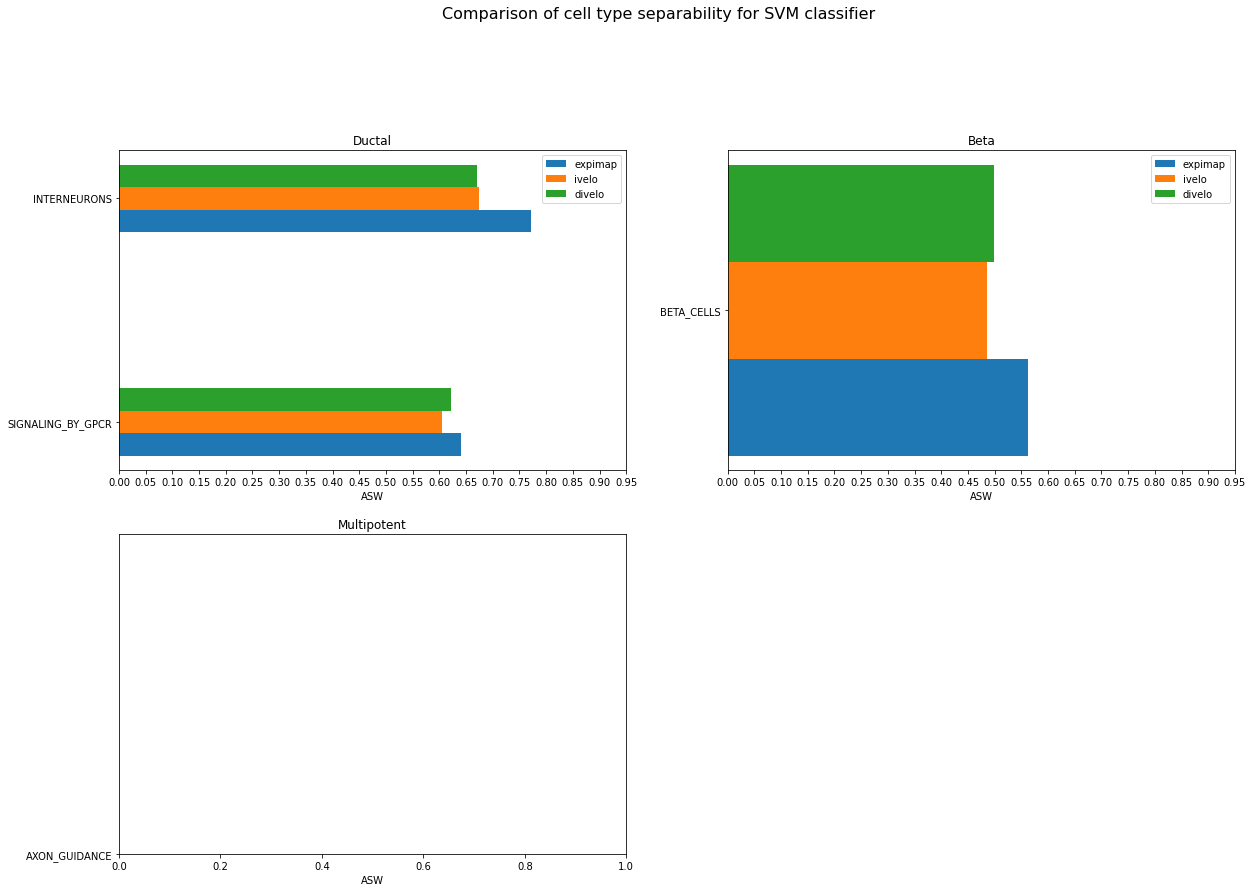

In [84]:
#shared GPs
#plot NMI per cell
cell_types=list(shared_GPs.keys())
fig = plt.figure(figsize=(20, 20))
fig.suptitle('Comparison of cell type separability for SVM classifier', fontsize=16)

for i, ct in enumerate(cell_types):
    
    plt.subplot(3,2,i+1)
    plt.xlabel("ASW")
    plt.title(f"{ct}")
    
    idx_expimap = [list(expimap[ct]["terms"]).index(term) for term in shared_GPs[ct]]
    idx_ivelo = [list(ivelo[ct]["terms"]).index(term) for term in shared_GPs[ct]]
    idx_divelo = [list(divelo[ct]["terms"]).index(term) for term in shared_GPs[ct]]
    
    ind = np.arange(len(shared_GPs[ct]))

    
    plt.yticks(ind, shared_GPs[ct])

    xvals_expimap = [expimap[ct]["SVM_ASW"][i] for i in idx_expimap]
    xvals_ivelo = [ivelo[ct]["SVM_ASW"][i] for i in idx_ivelo] 
    xvals_divelo = [divelo[ct]["SVM_ASW"][i] for i in idx_divelo] 
    plt.barh(ind-0.1, height=0.1, width = xvals_expimap, label="expimap")
    plt.barh(ind, height=0.1, width = xvals_ivelo, label="ivelo")
    plt.barh(ind+0.1, height=0.1, width = xvals_divelo, label="divelo")
    plt.xticks(np.arange(0, 1, 0.05))
    plt.legend()
    plt.savefig("figures/GP_comparison/SVM_ASW_shared")

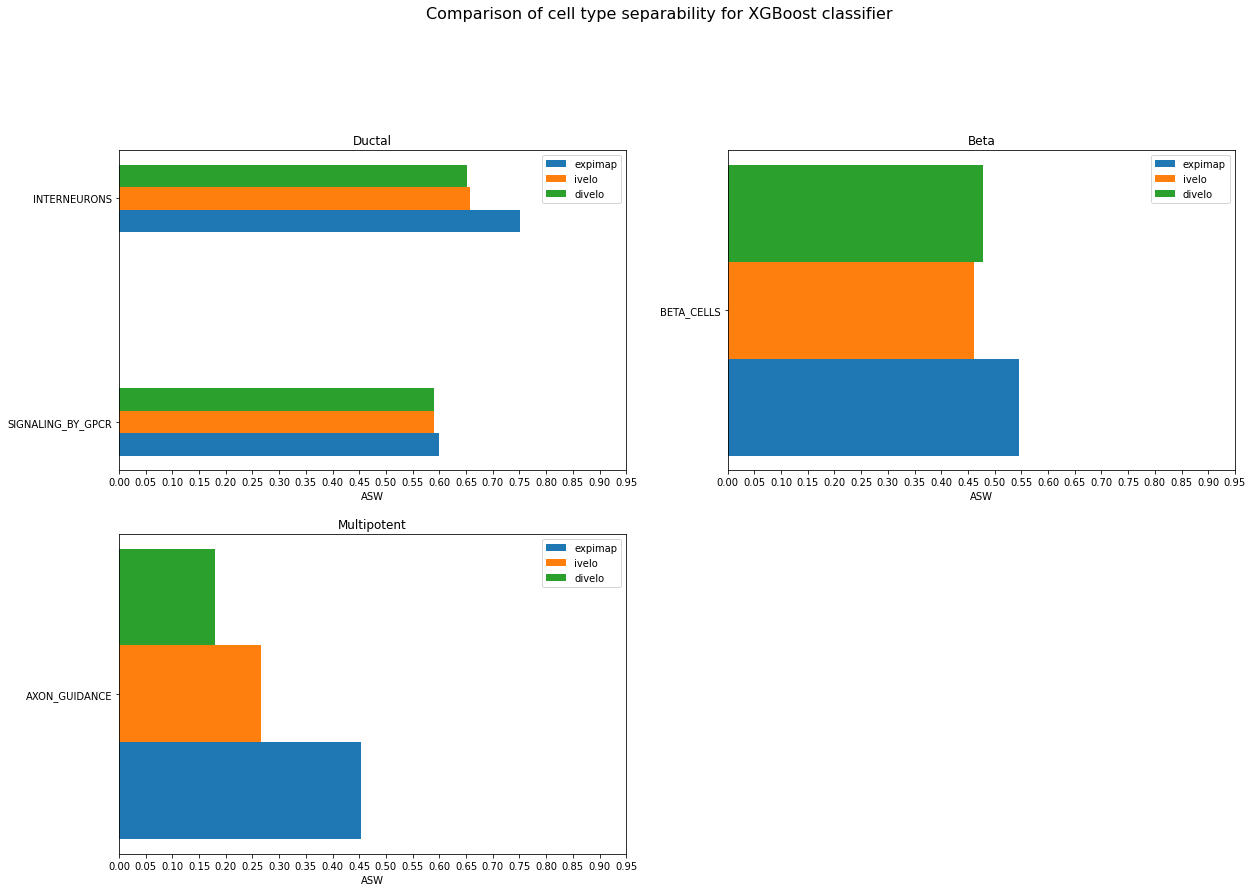

In [85]:
#shared GPs
#plot NMI per cell
cell_types=list(shared_GPs.keys())
fig = plt.figure(figsize=(20, 20))
fig.suptitle('Comparison of cell type separability for XGBoost classifier', fontsize=16)

for i, ct in enumerate(cell_types):
    
    plt.subplot(3,2,i+1)
    plt.xlabel("ASW")
    plt.title(f"{ct}")
    
    idx_expimap = [list(expimap[ct]["terms"]).index(term) for term in shared_GPs[ct]]
    idx_ivelo = [list(ivelo[ct]["terms"]).index(term) for term in shared_GPs[ct]]
    idx_divelo = [list(divelo[ct]["terms"]).index(term) for term in shared_GPs[ct]]
    
    ind = np.arange(len(shared_GPs[ct]))

    
    plt.yticks(ind, shared_GPs[ct])

    xvals_expimap = [expimap[ct]["XGB_ASW"][i] for i in idx_expimap]
    xvals_ivelo = [ivelo[ct]["XGB_ASW"][i] for i in idx_ivelo] 
    xvals_divelo = [divelo[ct]["XGB_ASW"][i] for i in idx_divelo] 
    plt.barh(ind-0.1, height=0.1, width = xvals_expimap, label="expimap")
    plt.barh(ind, height=0.1, width = xvals_ivelo, label="ivelo")
    plt.barh(ind+0.1, height=0.1, width = xvals_divelo, label="divelo")
    plt.xticks(np.arange(0, 1, 0.05))
    plt.legend()
    plt.savefig("figures/GP_comparison/XGB_ASW_shared")

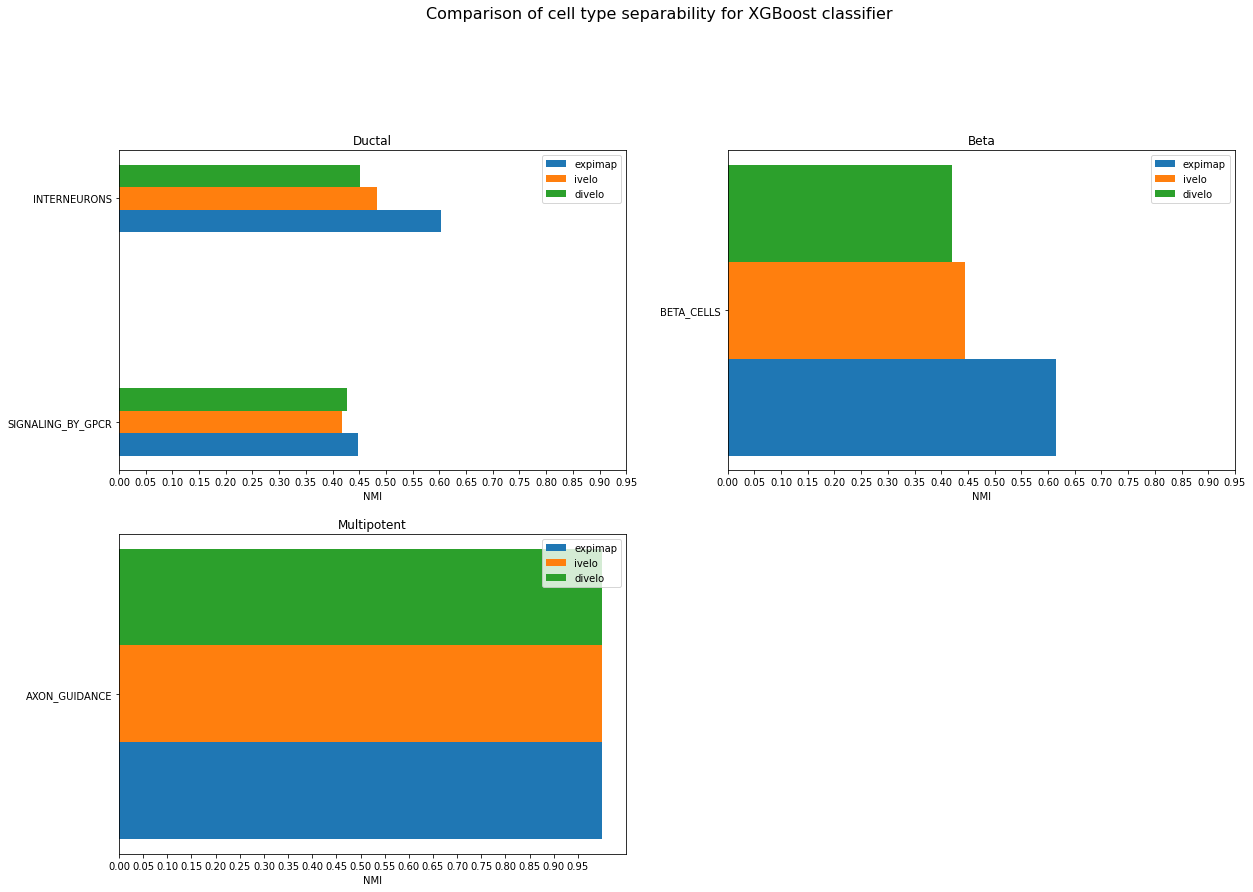

In [86]:
#shared GPs
#plot NMI per cell
cell_types=list(shared_GPs.keys())
fig = plt.figure(figsize=(20, 20))
fig.suptitle('Comparison of cell type separability for XGBoost classifier', fontsize=16)

for i, ct in enumerate(cell_types):
    
    plt.subplot(3,2,i+1)
    plt.xlabel("NMI")
    plt.title(f"{ct}")
    
    idx_expimap = [list(expimap[ct]["terms"]).index(term) for term in shared_GPs[ct]]
    idx_ivelo = [list(ivelo[ct]["terms"]).index(term) for term in shared_GPs[ct]]
    idx_divelo = [list(divelo[ct]["terms"]).index(term) for term in shared_GPs[ct]]
    
    ind = np.arange(len(shared_GPs[ct]))

    
    plt.yticks(ind, shared_GPs[ct])

    xvals_expimap = [expimap[ct]["XGB_NMI"][i] for i in idx_expimap]
    xvals_ivelo = [ivelo[ct]["XGB_NMI"][i] for i in idx_ivelo] 
    xvals_divelo = [divelo[ct]["XGB_NMI"][i] for i in idx_divelo] 
    plt.barh(ind-0.1, height=0.1, width = xvals_expimap, label="expimap")
    plt.barh(ind, height=0.1, width = xvals_ivelo, label="ivelo")
    plt.barh(ind+0.1, height=0.1, width = xvals_divelo, label="divelo")
    plt.xticks(np.arange(0, 1, 0.05))
    plt.legend()
    plt.savefig("figures/GP_comparison/XGB_NMI_shared")

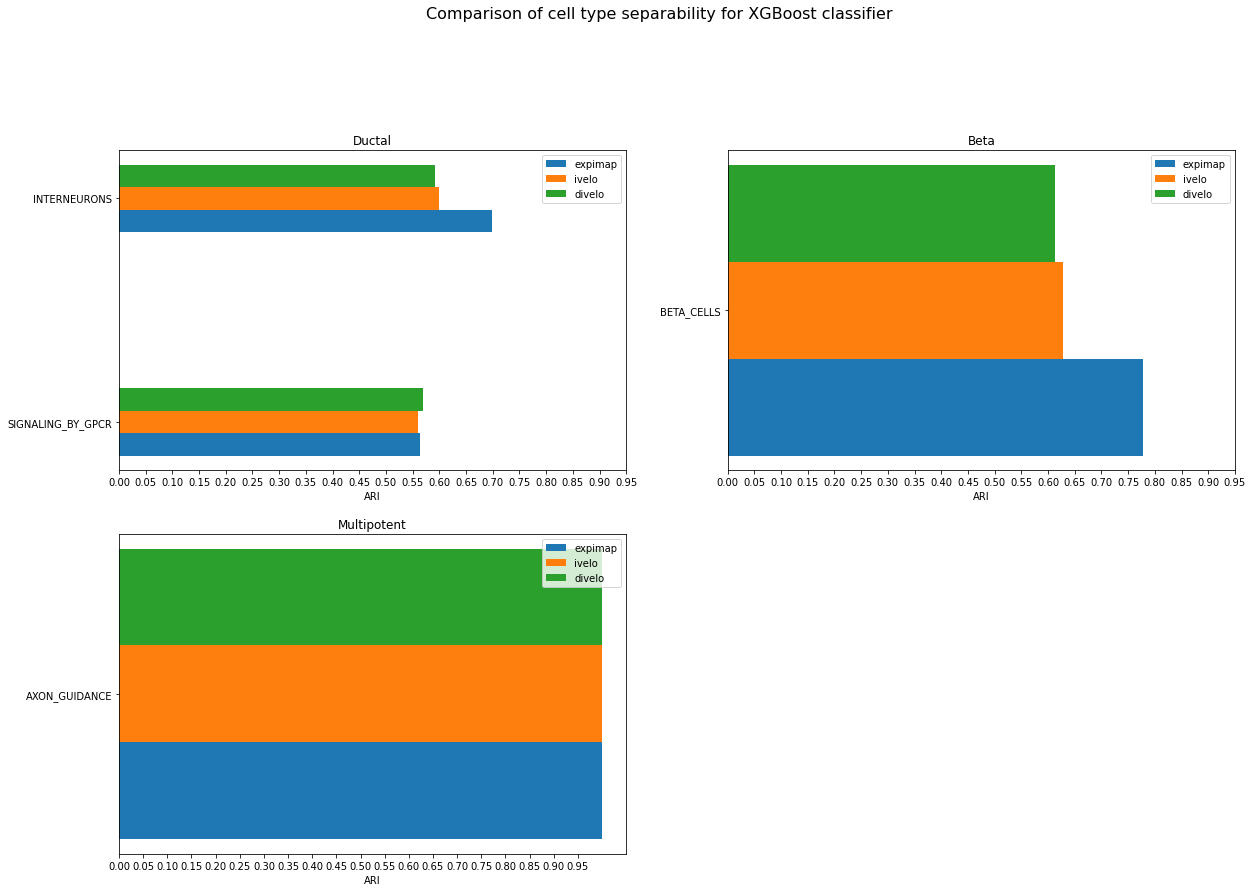

In [87]:
#shared GPs
#plot NMI per cell
cell_types=list(shared_GPs.keys())
fig = plt.figure(figsize=(20, 20))
fig.suptitle('Comparison of cell type separability for XGBoost classifier', fontsize=16)

for i, ct in enumerate(cell_types):
    
    plt.subplot(3,2,i+1)
    plt.xlabel("ARI")
    plt.title(f"{ct}")
    
    idx_expimap = [list(expimap[ct]["terms"]).index(term) for term in shared_GPs[ct]]
    idx_ivelo = [list(ivelo[ct]["terms"]).index(term) for term in shared_GPs[ct]]
    idx_divelo = [list(divelo[ct]["terms"]).index(term) for term in shared_GPs[ct]]
    
    ind = np.arange(len(shared_GPs[ct]))

    
    plt.yticks(ind, shared_GPs[ct])

    xvals_expimap = [expimap[ct]["XGB_ARI"][i] for i in idx_expimap]
    xvals_ivelo = [ivelo[ct]["XGB_ARI"][i] for i in idx_ivelo] 
    xvals_divelo = [divelo[ct]["XGB_ARI"][i] for i in idx_divelo] 
    plt.barh(ind-0.1, height=0.1, width = xvals_expimap, label="expimap")
    plt.barh(ind, height=0.1, width = xvals_ivelo, label="ivelo")
    plt.barh(ind+0.1, height=0.1, width = xvals_divelo, label="divelo")
    plt.xticks(np.arange(0, 1, 0.05))
    plt.legend()
    plt.savefig("figures/GP_comparison/XGB_ARI_shared")

In [ ]:
#plot accuracies per cell for SVM
from matplotlib import pyplot as plt
plt.figure(figsize=(40,18))
plt.title("SVM accuracy scored on training data for significant GPs")
cell_types1=["Trunk","Alpha","Beta","Epsilon", "Tip"]
for i, ct in enumerate(cell_types1):
    
    plt.subplot(3,2,i+1)
    plt.xlabel("accuracy")
    plt.title(f"{ct}")

    ind =expimap[ct]["terms"]
    xvals_expimap = expimap[ct]["acc"]
    plt.barh(ind, width = xvals_expimap)
    plt.savefig("figures/GP_comparison/acc_expimap1")

In [ ]:
#plot accuracies per cell
plt.figure(figsize=(40,30))
plt.title("SVM accuracy scored on training data for significant GPs")
cell_types2=["Ductal","Delta","Multipotent"]
for i, ct in enumerate(cell_types2):
    
    plt.subplot(3,2,i+1)
    plt.xlabel("accuracy")
    plt.title(f"{ct}")

    ind =expimap[ct]["terms"]
    xvals_expimap = expimap[ct]["acc"]
    plt.barh(ind, width = xvals_expimap)
plt.savefig("figures/GP_comparison/acc_expimap2")

In [ ]:
sum(divelo["Ductal"]["acc"])/len(divelo["Ductal"]["acc"])

In [ ]:
sum(expimap["Ductal"]["acc"])/len(expimap["Ductal"]["acc"])

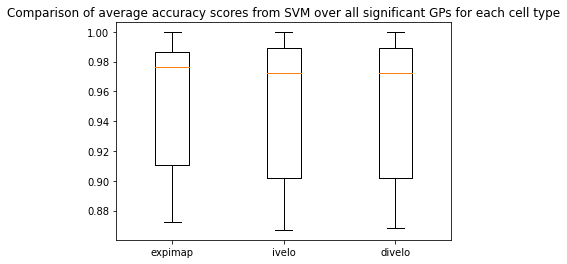

In [89]:
# Plot score distributions for SVM acc
import pandas as pd
avg_expimap=[]
avg_ivelo=[]
avg_divelo=[]
for ct in expimap.keys():
    if len(expimap[ct]["terms"])!=0:
        avg_expimap.append(sum(expimap[ct]["SVM_acc"])/len(expimap[ct]["SVM_acc"]))
    if len(ivelo[ct]["terms"])!=0:
        avg_ivelo.append(sum(ivelo[ct]["SVM_acc"])/len(ivelo[ct]["SVM_acc"]))
    if len(divelo[ct]["terms"])!=0:
        avg_divelo.append(sum(divelo[ct]["SVM_acc"])/len(divelo[ct]["SVM_acc"]))
#accuracies=pd.DataFrame({"Box1": avg_expimap, "Box2": avg_ivelo, "Box3": avg_divelo})
                        
#accuracies[['Box1', 'Box2', 'Box3']].plot(kind='box', title='Comparison of average accuracy scores over all significant GPs for each cell type')                    

fig1, ax1 = plt.subplots()
ax1.set_title('Comparison of average accuracy scores from SVM over all significant GPs for each cell type')
ax1.boxplot([avg_expimap, avg_ivelo, avg_divelo])
plt.xticks([1, 2, 3], ['expimap', 'ivelo', 'divelo'])
plt.savefig("figures/GP_comparison/score_distr_SVM_acc")

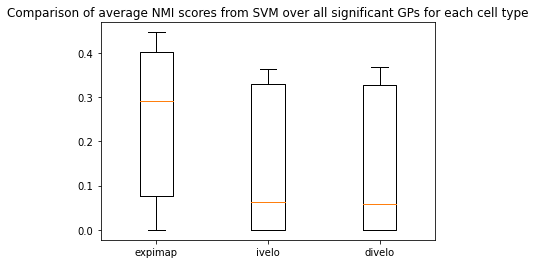

In [90]:
# Plot score distributions for SVM NMI
import pandas as pd
avg_expimap=[]
avg_ivelo=[]
avg_divelo=[]
for ct in expimap.keys():
    if len(expimap[ct]["terms"])!=0:
        avg_expimap.append(sum(expimap[ct]["SVM_NMI"])/len(expimap[ct]["SVM_NMI"]))
    if len(ivelo[ct]["terms"])!=0:
        avg_ivelo.append(sum(ivelo[ct]["SVM_NMI"])/len(ivelo[ct]["SVM_NMI"]))
    if len(divelo[ct]["terms"])!=0:
        avg_divelo.append(sum(divelo[ct]["SVM_NMI"])/len(divelo[ct]["SVM_NMI"]))
#accuracies=pd.DataFrame({"Box1": avg_expimap, "Box2": avg_ivelo, "Box3": avg_divelo})
                        
#accuracies[['Box1', 'Box2', 'Box3']].plot(kind='box', title='Comparison of average accuracy scores over all significant GPs for each cell type')                    

fig1, ax1 = plt.subplots()
ax1.set_title('Comparison of average NMI scores from SVM over all significant GPs for each cell type')
ax1.boxplot([avg_expimap, avg_ivelo, avg_divelo])
plt.xticks([1, 2, 3], ['expimap', 'ivelo', 'divelo'])
plt.savefig("figures/GP_comparison/score_distr_SVM_NMI")

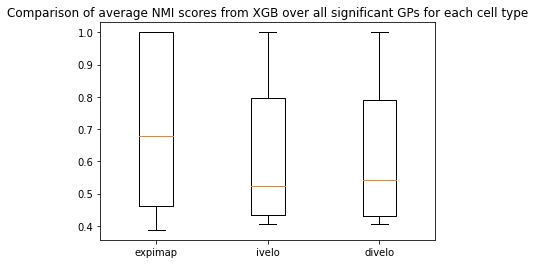

In [99]:
# Plot score distributions for XGB NMI
import pandas as pd
avg_expimap=[]
avg_ivelo=[]
avg_divelo=[]
for ct in expimap.keys():
    if len(expimap[ct]["terms"])!=0:
        avg_expimap.append(sum(expimap[ct]["XGB_NMI"])/len(expimap[ct]["XGB_NMI"]))
    if len(ivelo[ct]["terms"])!=0:
        avg_ivelo.append(sum(ivelo[ct]["XGB_NMI"])/len(ivelo[ct]["XGB_NMI"]))
    if len(divelo[ct]["terms"])!=0:
        avg_divelo.append(sum(divelo[ct]["XGB_NMI"])/len(divelo[ct]["XGB_NMI"]))
#accuracies=pd.DataFrame({"Box1": avg_expimap, "Box2": avg_ivelo, "Box3": avg_divelo})
                        
#accuracies[['Box1', 'Box2', 'Box3']].plot(kind='box', title='Comparison of average accuracy scores over all significant GPs for each cell type')                    

fig1, ax1 = plt.subplots()
ax1.set_title('Comparison of average NMI scores from XGB over all significant GPs for each cell type')
ax1.boxplot([avg_expimap, avg_ivelo, avg_divelo])
plt.xticks([1, 2, 3], ['expimap', 'ivelo', 'divelo'])
plt.savefig("figures/GP_comparison/score_distr_XGB_NMI")

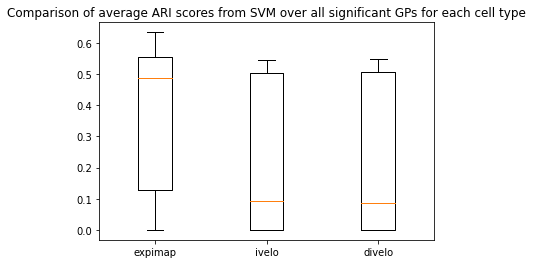

In [91]:
# Plot score distributions for SVM ARI
import pandas as pd
avg_expimap=[]
avg_ivelo=[]
avg_divelo=[]
for ct in expimap.keys():
    if len(expimap[ct]["terms"])!=0:
        avg_expimap.append(sum(expimap[ct]["SVM_ARI"])/len(expimap[ct]["SVM_ARI"]))
    if len(ivelo[ct]["terms"])!=0:
        avg_ivelo.append(sum(ivelo[ct]["SVM_ARI"])/len(ivelo[ct]["SVM_ARI"]))
    if len(divelo[ct]["terms"])!=0:
        avg_divelo.append(sum(divelo[ct]["SVM_ARI"])/len(divelo[ct]["SVM_ARI"]))
#accuracies=pd.DataFrame({"Box1": avg_expimap, "Box2": avg_ivelo, "Box3": avg_divelo})
                        
#accuracies[['Box1', 'Box2', 'Box3']].plot(kind='box', title='Comparison of average accuracy scores over all significant GPs for each cell type')                    

fig1, ax1 = plt.subplots()
ax1.set_title('Comparison of average ARI scores from SVM over all significant GPs for each cell type')
ax1.boxplot([avg_expimap, avg_ivelo, avg_divelo])
plt.xticks([1, 2, 3], ['expimap', 'ivelo', 'divelo'])
plt.savefig("figures/GP_comparison/score_distr_SVM_ARI")

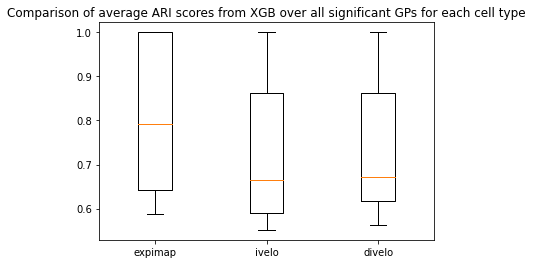

In [100]:
# Plot score distributions for XGB ARI
import pandas as pd
avg_expimap=[]
avg_ivelo=[]
avg_divelo=[]
for ct in expimap.keys():
    if len(expimap[ct]["terms"])!=0:
        avg_expimap.append(sum(expimap[ct]["XGB_ARI"])/len(expimap[ct]["XGB_ARI"]))
    if len(ivelo[ct]["terms"])!=0:
        avg_ivelo.append(sum(ivelo[ct]["XGB_ARI"])/len(ivelo[ct]["XGB_ARI"]))
    if len(divelo[ct]["terms"])!=0:
        avg_divelo.append(sum(divelo[ct]["XGB_ARI"])/len(divelo[ct]["XGB_ARI"]))
#accuracies=pd.DataFrame({"Box1": avg_expimap, "Box2": avg_ivelo, "Box3": avg_divelo})
                        
#accuracies[['Box1', 'Box2', 'Box3']].plot(kind='box', title='Comparison of average accuracy scores over all significant GPs for each cell type')                    

fig1, ax1 = plt.subplots()
ax1.set_title('Comparison of average ARI scores from XGB over all significant GPs for each cell type')
ax1.boxplot([avg_expimap, avg_ivelo, avg_divelo])
plt.xticks([1, 2, 3], ['expimap', 'ivelo', 'divelo'])
plt.savefig("figures/GP_comparison/score_distr_XGB_ARI")

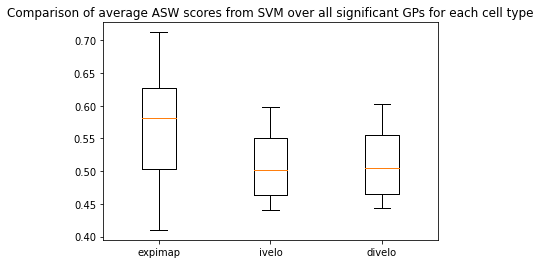

In [98]:
# Plot score distributions for SVM ASW
import pandas as pd
avg_expimap=[]
avg_ivelo=[]
avg_divelo=[]
for ct in expimap.keys():
    if len(expimap[ct]["terms"])!=0:
        if len(expimap[ct]["SVM_ASW"])!=0:
            avg_expimap.append(sum(expimap[ct]["SVM_ASW"])/len(expimap[ct]["SVM_ASW"]))
    if len(ivelo[ct]["terms"])!=0:
        if len(ivelo[ct]["SVM_ASW"])!=0:
            avg_ivelo.append(sum(ivelo[ct]["SVM_ASW"])/len(ivelo[ct]["SVM_ASW"]))
    if len(divelo[ct]["terms"])!=0:
        if len(divelo[ct]["SVM_ASW"])!=0:
            avg_divelo.append(sum(divelo[ct]["SVM_ASW"])/len(divelo[ct]["SVM_ASW"]))
#accuracies=pd.DataFrame({"Box1": avg_expimap, "Box2": avg_ivelo, "Box3": avg_divelo})
                        
#accuracies[['Box1', 'Box2', 'Box3']].plot(kind='box', title='Comparison of average accuracy scores over all significant GPs for each cell type')                    

fig1, ax1 = plt.subplots()
ax1.set_title('Comparison of average ASW scores from SVM over all significant GPs for each cell type')
ax1.boxplot([avg_expimap, avg_ivelo, avg_divelo])
plt.xticks([1, 2, 3], ['expimap', 'ivelo', 'divelo'])
plt.savefig("figures/GP_comparison/score_distr_SVM_ASW")

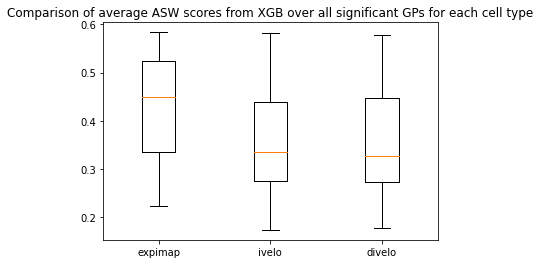

In [102]:
# Plot score distributions for XGB ASW
import pandas as pd
avg_expimap=[]
avg_ivelo=[]
avg_divelo=[]
for ct in expimap.keys():
    if len(expimap[ct]["terms"])!=0:
        if len(expimap[ct]["XGB_ASW"])!=0:
            avg_expimap.append(sum(expimap[ct]["XGB_ASW"])/len(expimap[ct]["XGB_ASW"]))
    if len(ivelo[ct]["terms"])!=0:
        if len(ivelo[ct]["XGB_ASW"])!=0:
            avg_ivelo.append(sum(ivelo[ct]["XGB_ASW"])/len(ivelo[ct]["XGB_ASW"]))
    if len(divelo[ct]["terms"])!=0:
        if len(divelo[ct]["XGB_ASW"])!=0:
            avg_divelo.append(sum(divelo[ct]["XGB_ASW"])/len(divelo[ct]["XGB_ASW"]))
#accuracies=pd.DataFrame({"Box1": avg_expimap, "Box2": avg_ivelo, "Box3": avg_divelo})
                        
#accuracies[['Box1', 'Box2', 'Box3']].plot(kind='box', title='Comparison of average accuracy scores over all significant GPs for each cell type')                    

fig1, ax1 = plt.subplots()
ax1.set_title('Comparison of average ASW scores from XGB over all significant GPs for each cell type')
ax1.boxplot([avg_expimap, avg_ivelo, avg_divelo])
plt.xticks([1, 2, 3], ['expimap', 'ivelo', 'divelo'])
plt.savefig("figures/GP_comparison/score_distr_XGB_ASW")